## Text Analysis, NLP, and NLTK

In this tutorial, we will cover the following concepts:
* Text Analysis Operations using NLTK
    * Tokenization
    * Stopwords
    * Lexicon Normalization such as Stemming and Lemmatization
    * POS Tagging
* Sentiment Analysis
* Text Classification
* Performing Sentiment Analysis using Text Classification

## Intalling Natural Language Processing Toolkit (nltk)
If you have not worked with _nltk_ before, you will need to install it using command line tools.
1. Launch Terminal (mac) or Command Prompt (windows)
    * On MacOS, go to Applications --> Utilities --> Terminal
    * On Windows:
        * Right-click the Windows icon in the bottom-left corner of your screen
        * Command Prompt will appear in the menu twice: Command Prompt and Command Prompt (Admin). The second option will open an "elevated" Command Prompt, which gives you administrator privileges, which are required for some commands. In nearly all cases, it's better to use the elevated Command Prompt — it can do everything that the normal Command Prompt can and more.
2. In the Terminal or Command Prompt, type **_pip3 install nltk_** and hit the "Enter" key

In [3]:
# This will check if you have nltk, and if not, install it automatically
!pip install nltk 

In [4]:
#Loading NLTK
import nltk

# Load appropriate libraries
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
    "wordnet"
])

[nltk_data] Downloading package names to /Users/dmitriyb/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitriyb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/dmitriyb/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/dmitriyb/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/dmitriyb/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dmitriyb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dmitr

True

#### Tokenization
* Tokenization is the first step in text analytics. 
* The process of breaking down a text paragraph into smaller chunks such as words or sentence is called **Tokenization**. 
* Token is a single entity that is building blocks for sentence or paragraph.

#### Sentence Tokenization
* Sentence tokenizer breaks text paragraph into sentences.

In [6]:
from nltk.tokenize import sent_tokenize

text="I had a terrible experience playing the League of Legends.  "
text+= "Everybody was horribly mean to me and I was traumatized by this "
text+= "horrible experience. It was really terrible. "
text+= "Even though players were assholes, the game play and the UI are really nice."

tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['I had a terrible experience playing the League of Legends.', 'Everybody was horribly mean to me and I was traumatized by this horrible experience.', 'It was really terrible.', 'Even though players were assholes, the game play and the UI are really nice.']


#### Word Tokenization
* Word tokenizer breaks text paragraph into words.

In [7]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['I', 'had', 'a', 'terrible', 'experience', 'playing', 'the', 'League', 'of', 'Legends', '.', 'Everybody', 'was', 'horribly', 'mean', 'to', 'me', 'and', 'I', 'was', 'traumatized', 'by', 'this', 'horrible', 'experience', '.', 'It', 'was', 'really', 'terrible', '.', 'Even', 'though', 'players', 'were', 'assholes', ',', 'the', 'game', 'play', 'and', 'the', 'UI', 'are', 'really', 'nice', '.']


#### Frequency Distribution

In [8]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 35 samples and 47 outcomes>


In [10]:
fdist.most_common(2)

[('.', 4), ('the', 3)]

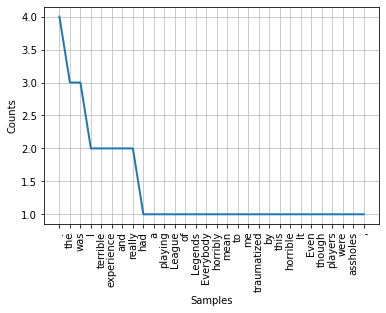

In [11]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Stopwords
* Stopwords considered as noise in the text. 
* Text may contain stop words such as is, am, are, this, a, an, the, etc.
* In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'didn', "haven't", 'same', 'd', "won't", 'wouldn', "mightn't", 'that', 'a', 'them', 'your', 'o', 'yourselves', 'so', 'some', 'in', 'nor', 'all', 'needn', 'for', 'below', 'only', 'more', "didn't", "wouldn't", 'at', 'before', 'further', "you're", 'haven', 'isn', 'i', 'himself', 'or', 'on', 'there', 'up', 'who', 'other', 're', 'most', "couldn't", 'you', 'yours', "weren't", "don't", 'about', 'if', 'such', 'shan', 'will', 'through', 'down', 'while', "that'll", 'have', "wasn't", 'has', 'weren', 'too', "shan't", 'these', 'very', 'their', 'myself', 'aren', "you've", 'again', "it's", 'am', 'herself', "hasn't", "isn't", 'be', 'theirs', 'ain', 'until', 'shouldn', 'we', 'here', 'are', "you'd", 'can', "shouldn't", 'been', 'against', "aren't", 'my', "should've", 'won', 've', 'its', 'this', 'how', 'ours', 'him', 'themselves', 'those', 'does', 'once', 'to', 't', "hadn't", 'where', 'couldn', 'y', 'having', 'because', 'what', 'over', 'is', 'doesn', 'hadn', 'when', 'being', "needn't", 'doing', 'her', 't

#### Removing Stopwords

In [17]:
filtered_sent=[]
for sent in tokenized_sent:
    tokenized_word=word_tokenize(sent)
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['I had a terrible experience playing the League of Legends.', 'Everybody was horribly mean to me and I was traumatized by this horrible experience.', 'It was really terrible.', 'Even though players were assholes, the game play and the UI are really nice.']
Filterd Sentence: ['I', 'terrible', 'experience', 'playing', 'League', 'Legends', '.', 'Everybody', 'horribly', 'mean', 'I', 'traumatized', 'horrible', 'experience', '.', 'It', 'really', 'terrible', '.', 'Even', 'though', 'players', 'assholes', ',', 'game', 'play', 'UI', 'really', 'nice', '.']


#### Lexicon Normalization
* Lexicon normalization considers another type of noise in the text. 
* For example, **connection, connected, connecting** word reduce to a common word "**connect**". 
* It reduces derivationally related forms of a word to a common root word.

#### Stemming
* Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. 
* For example, connection, connected, connecting word reduce to a common word "connect".

In [18]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['I', 'terrible', 'experience', 'playing', 'League', 'Legends', '.', 'Everybody', 'horribly', 'mean', 'I', 'traumatized', 'horrible', 'experience', '.', 'It', 'really', 'terrible', '.', 'Even', 'though', 'players', 'assholes', ',', 'game', 'play', 'UI', 'really', 'nice', '.']
Stemmed Sentence: ['I', 'terribl', 'experi', 'play', 'leagu', 'legend', '.', 'everybodi', 'horribl', 'mean', 'I', 'traumat', 'horribl', 'experi', '.', 'It', 'realli', 'terribl', '.', 'even', 'though', 'player', 'asshol', ',', 'game', 'play', 'UI', 'realli', 'nice', '.']


In [19]:
ps.stem("Run")

'run'

In [21]:
ps.stem("running")

'run'

In [22]:
ps.stem("ran")

'ran'

#### Lemmatization
* Lemmatization reduces words to their base word, which is linguistically correct lemmas. 
* It transforms root word with the use of vocabulary and morphological analysis. 
* Lemmatization is usually more sophisticated than stemming. 
* Stemmer works on an individual word without knowledge of the context. 
* For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.



In [23]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))


Lemmatized Word: fly
Stemmed Word: fli


In [34]:
lemmatized_words=[]
for w in filtered_sent:
    lemmatized_words.append(lem.lemmatize(w,"v"))

print("Filtered Sentence:",filtered_sent)
print("Lemmatized Sentence:",lemmatized_words)

Filtered Sentence: ['I had a terrible experience playing the League of Legends.', 'Everybody was horribly mean to me and I was traumatized by this horrible experience.', 'It was really terrible.']
Lemmatized Sentence: ['I had a terrible experience playing the League of Legends.', 'Everybody was horribly mean to me and I was traumatized by this horrible experience.', 'It was really terrible.']


In [24]:
lem.lemmatize("run","v")

'run'

In [26]:
lem.lemmatize("ran","v")

'run'

In [25]:
lem.lemmatize("running","v")

'run'

#### POS Tagging
* The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. 
* Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. 
* POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [27]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [28]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

### Sentiment Analysis
* Quantifying users content, idea, belief, and opinion is known as sentiment analysis. 
* Sentiment analysis helps in understanding "the feeling" of a response or a statement
* Used in marketing, politics, research, and security.
* There are mainly two approaches for performing sentiment analysis:
    * **Lexicon-based**: count number of positive and negative words in given text and the larger count will be the sentiment of text.
    * **Machine learning based** approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.



#### Performing Sentiment Analysis

In [31]:
# Import pandas
import pandas as pd

In [32]:
data=pd.read_csv('movie_reviews.tsv', sep='\t')
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

This dataset has four columns: PhraseId, SentenceId, Phrase, and Sentiment.

The data has 5 sentiment labels:
* 0 - negative 
* 1 - somewhat negative 
* 2 - neutral 
* 3 - somewhat positive 
* 4 - positive

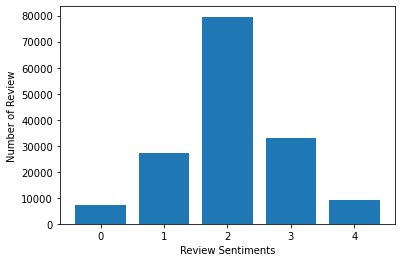

In [33]:
# We can also plot our data to see the distribution of review sentiments
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, you really suck as a LOL player!")

{'neg': 0.212, 'neu': 0.265, 'pos': 0.523, 'compound': 0.6904}

In [35]:
sia.polarity_scores("You really suck as a LOL player!")

{'neg': 0.283, 'neu': 0.355, 'pos': 0.362, 'compound': 0.2253}

In [36]:
sia.polarity_scores("You really suck as a league of legends player!")

{'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'compound': -0.54}

In [38]:
for idx, row in data.iterrows():
    print(row['Phrase'] + ": ", sia.polarity_scores(row['Phrase']) )
    print("_________________")

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .:  {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.5579}
_________________
A series of escapades demonstrating the adage that what is good for the goose:  {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
_________________
A series:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
series:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of escapades demonstrating the adage that what is good for the goose:  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
_________________
of:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
escapades demonstrating the adage that what is good for the goose:  {'neg': 0.0, 'neu': 0.775, 'pos': 0.

the same reason:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
same reason:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
same:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
reason:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
There 's little to recommend Snow Dogs , unless one considers cliched dialogue and perverse escapism a source of high hilarity .:  {'neg': 0.127, 'neu': 0.772, 'pos': 0.101, 'compound': -0.1477}
_________________
There:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's little to recommend Snow Dogs , unless one considers cliched dialogue and perverse escapism a source of high hilarity .:  {'neg': 0.133, 'neu': 0.761, 'pos': 0.106, 'compound': -0.1477}
_________________
's little to recommend Snow Dogs , unless one considers cliched dialogue and perverse escapism a source of high hilarity:  {'neg': 0.133, 'neu': 0.761, 'pos': 0.106

should:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
remain just that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
remain:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
just that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
just:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The performances are an absolute joy .:  {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}
_________________
The performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
are an absolute joy .:  {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
_________________
are an absolute joy:  {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
_________________
are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
an a

expect:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
but nothing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
nothing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
more:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Best indie of the year , so far .:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
_________________
Best:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
_________________
indie of the year , so far .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
indie of the year , so far:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
indie of the year ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
indie of the year:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
indie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of th

_________________
reason to be in the theater beyond Wilde 's wit and the actors ' performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to be in the theater beyond Wilde 's wit and the actors ' performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be in the theater beyond Wilde 's wit and the actors ' performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be in the theater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in the theater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the theater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
theater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
beyond Wilde 's wit and the actors ' performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
beyond:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_______

is more interested in entertaining itself than in amusing us:  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.8297}
_________________
more interested in entertaining itself than in amusing us:  {'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.8297}
_________________
more interested in entertaining itself:  {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7316}
_________________
interested in entertaining itself:  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.6808}
_________________
interested:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
_________________
in entertaining itself:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
entertaining itself:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
itself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
than in amusing us:  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3818}
_________________
in amusing

boy weirdo role:  {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}
_________________
boy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
weirdo role:  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}
_________________
weirdo:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
_________________
role:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If a horror movie 's primary goal is to frighten and disturb , then They works spectacularly well ... A shiver-inducing , nerve-rattling ride .:  {'neg': 0.327, 'neu': 0.595, 'pos': 0.078, 'compound': -0.7717}
_________________
If a horror movie 's primary goal is to frighten and disturb:  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.8316}
_________________
a horror movie 's primary goal is to frighten and disturb:  {'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.8316}
_________________
a horror movie 's primary goal:  {'neg': 0.481, 'neu': 

any:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of David:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
David:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mamet 's airless cinematic shell games .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mamet 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mamet:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
airless cinematic shell games .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
airless cinematic shell games:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
airless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cinematic shell games:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cinematic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shell gam

clunky TV-movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
clunky:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
TV-movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
approach:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to detailing a chapter in the life of the celebrated Irish playwright , poet and drinker:  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719}
_________________
detailing a chapter in the life of the celebrated Irish playwright , poet and drinker:  {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}
_________________
detailing a chapter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
detailing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a chapter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
chapter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


a bygone era , and its convolutions ...:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a bygone era , and its convolutions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a bygone era , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a bygone era ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a bygone era:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bygone era:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bygone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
era:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its convolutions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
convolutions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
silly rather than plausible:  {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.

above all:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it 's a love story as sanguine as its title .:  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
_________________
's a love story as sanguine as its title .:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}
_________________
's a love story as sanguine as its title:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}
_________________
a love story as sanguine as its title:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
_________________
a love story as sanguine:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
_________________
a love story:  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
_________________
love story:  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
_________________
as sanguine:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

eventually goes overboard with a loony melodramatic denouement in which a high school swimming pool substitutes for a bathtub .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
eventually:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes overboard with a loony melodramatic denouement in which a high school swimming pool substitutes for a bathtub .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes overboard with a loony melodramatic denouement in which a high school swimming pool substitutes for a bathtub:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes overboard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
overboard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with a loony melodramatic denouement in which a high school swimming pool substit

Spielberg 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Spielberg:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Schindler 's List:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Schindler 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Schindler:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
List:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Inventive , fun , intoxicatingly sexy , violent , self-indulgent and maddening .:  {'neg': 0.399, 'neu': 0.225, 'pos': 0.376, 'compound': -0.1027}
_________________
Inventive , fun , intoxicatingly sexy , violent , self-indulgent and maddening:  {'neg': 0.399, 'neu': 0.225, 'pos': 0.376, 'compound': -0.1027}
_________________
Inventive , fun ,:  {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
_________________
Inventive , fun:  {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, '

music:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
comic antics:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
comic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
antics:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, but through the perverse pleasure of watching Disney scrape the bottom of its own cracker barrel:  {'neg': 0.163, 'neu': 0.615, 'pos': 0.222, 'compound': 0.3291}
_________________
, but:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
through the perverse pleasure of watching Disney scrape the bottom of its own cracker barrel:  {'neg': 0.144, 'neu': 0.667, 'pos': 0.19, 'compound': 0.2263}
_________________
the perverse pleasure of watching Disney scrape the bottom of its own cracker barrel:  {'neg': 0.151, 'neu': 0.649, 'pos': 0.2, 'compound': 0.2263}
_________________
the perverse pleasure:  {'neg': 0.373, 'neu': 0.133, 'pos': 0.493, 'c

Tsai:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
may be ploughing the same furrow once too often .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
may be ploughing the same furrow once too often:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
may:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be ploughing the same furrow once too often:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ploughing the same furrow once too often:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ploughing the same furrow:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ploughing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the same furrow:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
same furrow:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
furr

the cost:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cost:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of moral compromise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
moral compromise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
moral:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
compromise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The narrative is so consistently unimaginative that probably the only way to have saved the film is with the aid of those wisecracking Mystery Science Theater 3000 guys .:  {'neg': 0.053, 'neu': 0.855, 'pos': 0.092, 'compound': 0.296}
_________________
The narrative:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is so consistently unimaginative that probably the only way to have saved the film is with the aid of those wisecracking Mystery Science Theater 30

trying to dupe the viewer into taking it all as Very Important simply because the movie is ugly to look at and not a Hollywood product:  {'neg': 0.194, 'neu': 0.736, 'pos': 0.07, 'compound': -0.5729}
_________________
to dupe the viewer into taking it all as Very Important simply because the movie is ugly to look at and not a Hollywood product:  {'neg': 0.201, 'neu': 0.727, 'pos': 0.072, 'compound': -0.5729}
_________________
dupe the viewer into taking it all as Very Important simply because the movie is ugly to look at and not a Hollywood product:  {'neg': 0.208, 'neu': 0.717, 'pos': 0.075, 'compound': -0.5729}
_________________
dupe the viewer into taking it all as Very Important:  {'neg': 0.199, 'neu': 0.635, 'pos': 0.166, 'compound': -0.1045}
_________________
dupe the viewer:  {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
_________________
dupe:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}
_________________
the viewer:  {'neg': 0.0, 'neu': 1.0, 'pos'

succeed:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}
_________________
Mr. Polanski is in his element here : alone , abandoned , but still consoled by his art , which is more than he has ever revealed before about the source of his spiritual survival .:  {'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.3612}
_________________
Mr. Polanski is in his element here : alone , abandoned , but still consoled by his art , which is more than he has ever revealed before about the source of his spiritual survival:  {'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.3612}
_________________
Mr. Polanski is in his element here ::  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mr. Polanski is in his element here:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mr. Polanski:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Polanski:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_______________

being both revelatory and narcissistic ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
being both revelatory and narcissistic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
both revelatory and narcissistic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
revelatory and narcissistic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
revelatory and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
revelatory:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
narcissistic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
achieving some honest insight into relationships that most high-concept films candy-coat with pat storylines , precious circumstances and beautiful stars:  {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.8979}
_________________
achieving some honest insight into relationships:  {'neg': 0.0, 'ne

to the adrenaline jolt of a sudden lunch rush at the diner:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the adrenaline jolt of a sudden lunch rush at the diner:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the adrenaline jolt:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
adrenaline jolt:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
adrenaline:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
jolt:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of a sudden lunch rush at the diner:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a sudden lunch rush at the diner:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a sudden lunch rush:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sudden lunch rush:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
____

bonus feature:  {'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.5423}
_________________
bonus:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
_________________
on the DVD:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the DVD:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
DVD:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
It 's hard to say who might enjoy this , are there Tolstoy groupies out there ?:  {'neg': 0.08, 'neu': 0.739, 'pos': 0.182, 'compound': 0.4215}
_________________
It 's hard to say who might enjoy this:  {'neg': 0.121, 'neu': 0.603, 'pos': 0.276, 'compound': 0.4215}
_________________
's hard to say who might enjoy this:  {'neg': 0.132, 'neu': 0.566, 'pos': 0.302, 'compound': 0.4215}
_________________
hard to say who might enjoy this:  {'neg': 0.146, 'neu': 0.521, 'pos': 0.333, 'compound': 0.4215}
_________________
to say who might enjoy this:  {'neg': 0.0, 'neu': 0.61, 'p

a scruffy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scruffy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Giannini:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Madonna gives her best performance since Abel Ferrara had her beaten to a pulp in his Dangerous Game .:  {'neg': 0.245, 'neu': 0.581, 'pos': 0.174, 'compound': -0.1779}
_________________
Madonna gives her best performance since Abel Ferrara had her beaten to a pulp in his Dangerous Game .:  {'neg': 0.245, 'neu': 0.581, 'pos': 0.174, 'compound': -0.1779}
_________________
Madonna:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gives her best performance since Abel Ferrara had her beaten to a pulp in his Dangerous Game .:  {'neg': 0.255, 'neu': 0.563, 'pos': 0.182, 'compound': -0.1779}
_________________
gives her best performance since Abel Ferrara had her beaten to a pulp in his Dangerous Game:  {'neg': 0.255, 'neu

who never seems aware of his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
never seems aware of his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
never:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seems aware of his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
aware of his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
aware:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
his own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
own coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
coolness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Feels like the work of an artist who is simply tire

's the filmmakers ' post-camp comprehension of what made old-time B movies good-bad that makes Eight Legged Freaks a perfectly entertaining summer diversion .:  {'neg': 0.055, 'neu': 0.667, 'pos': 0.278, 'compound': 0.7717}
_________________
's the filmmakers ' post-camp comprehension of what made old-time B movies good-bad that makes Eight Legged Freaks a perfectly entertaining summer diversion:  {'neg': 0.055, 'neu': 0.667, 'pos': 0.278, 'compound': 0.7717}
_________________
the filmmakers ' post-camp comprehension of what made old-time B movies good-bad that makes Eight Legged Freaks a perfectly entertaining summer diversion:  {'neg': 0.057, 'neu': 0.653, 'pos': 0.29, 'compound': 0.7717}
_________________
the filmmakers ' post-camp comprehension:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the filmmakers ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
filmmakers ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_______

_________________
exist:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, other than to employ Hollywood kids and people who owe favors to their famous parents .:  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
_________________
other than to employ Hollywood kids and people who owe favors to their famous parents .:  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
_________________
other than to employ Hollywood kids and people who owe:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
than to employ Hollywood kids and people who owe:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to employ Hollywood kids and people who owe:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to employ Hollywood kids and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to employ Hollywood kids:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
____________

Wallace gets a bit heavy handed with his message at times , and has a visual flair that waxes poetic far too much for our taste .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Wallace:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gets a bit heavy handed with his message at times , and has a visual flair that waxes poetic far too much for our taste .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gets a bit heavy handed with his message at times , and has a visual flair that waxes poetic far too much for our taste:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gets a bit heavy handed with his message at times , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gets a bit heavy handed with his message at times ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gets a bit heavy handed with his message at times:  {'neg': 0.0, 'ne

moving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
without stooping to base melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stooping to base melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stooping:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to base melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
base melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
base:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Evokes the style and flash of the double-cross that made Mamet 's `` House of Games '' and last fall 's `` Heist '' so much fun .:  {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5542}
_________________
Evokes the style and flash of the double-cross that made Mamet 's `` Ho

depress you about life itself:  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.4939}
_________________
depress you:  {'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'compound': -0.4939}
_________________
depress:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
_________________
about life itself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
life itself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If you saw it on TV , you 'd probably turn it off , convinced that you had already seen that movie .:  {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019}
_________________
If you saw it on TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you saw it on TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
saw it on TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
saw it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_____________

_________________
amusing little catch:  {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}
_________________
little catch:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
catch:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Storytelling feels slight .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
feels slight .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
feels slight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
slight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Monte Cristo smartly emphasizes the well-wrought story and omits needless chase scenes and swordfights as the revenge unfolds .:  {'neg': 0.155, 'neu': 0.731, 'pos': 0.114, 'compound': -0.2263}
_________________
Monte Cristo:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Monte:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

Damon brings the proper conviction to his role as -LRB- Jason Bourne -RRB- .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Damon:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brings the proper conviction to his role as -LRB- Jason Bourne -RRB- .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brings the proper conviction to his role as -LRB- Jason Bourne -RRB-:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brings the proper conviction:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the proper conviction:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
proper conviction:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
proper:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
conviction:  {'neg': 0.0, 'n

shown up at the appointed time and place:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shown up:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shown:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
at the appointed time and place:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the appointed time and place:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the appointed time and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the appointed time:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
appointed time:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
appointed:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
visible enthusiasm is mighty hard to find:  {'neg': 0.151, 'neu': 0.538, 'pos': 0.312, 'compound': 0.3612}
_________________
visible enthusiasm:  {'ne

more confused , less interesting and more sloppily:  {'neg': 0.253, 'neu': 0.487, 'pos': 0.26, 'compound': 0.0201}
_________________
more confused , less interesting and more:  {'neg': 0.28, 'neu': 0.432, 'pos': 0.288, 'compound': 0.0201}
_________________
more confused , less interesting and:  {'neg': 0.314, 'neu': 0.363, 'pos': 0.323, 'compound': 0.0201}
_________________
more confused , less interesting:  {'neg': 0.357, 'neu': 0.275, 'pos': 0.368, 'compound': 0.0201}
_________________
more confused ,:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3804}
_________________
more confused:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3804}
_________________
confused:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
_________________
less interesting:  {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.3415}
_________________
sloppily:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
made film could possibly come down the road i

With its lackadaisical plotting and mindless action:  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.6705}
_________________
its lackadaisical plotting and mindless action:  {'neg': 0.579, 'neu': 0.421, 'pos': 0.0, 'compound': -0.6705}
_________________
lackadaisical plotting and mindless action:  {'neg': 0.647, 'neu': 0.353, 'pos': 0.0, 'compound': -0.6705}
_________________
lackadaisical:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}
_________________
plotting and mindless action:  {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
_________________
plotting and mindless:  {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}
_________________
plotting and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
plotting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
mindless:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
_________________
, All About the Benjamins evokes the bottom tier

the kind of ` laugh therapy ' I need from movie comedies:  {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.719}
_________________
the kind of ` laugh therapy ':  {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.5118}
_________________
of ` laugh therapy ':  {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.5574}
_________________
` laugh therapy ':  {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
_________________
laugh therapy ':  {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
_________________
laugh:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
_________________
therapy ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
therapy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
I need from movie comedies:  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
_________________
need from movie comedies:  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
_________

human:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is generous and deep:  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
_________________
generous and deep:  {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.5106}
_________________
generous and:  {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
_________________
generous:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
Feral and uncomfortable .:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}
_________________
Feral and uncomfortable:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}
_________________
Feral and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Feral:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
uncomfortable:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}
_________________
Sillier , cuter , and shorter than the first -LRB- as best I remember

ominous , pervasive , and unknown threat:  {'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'compound': -0.7003}
_________________
ominous:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
_________________
, pervasive , and unknown threat:  {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}
_________________
pervasive , and unknown threat:  {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}
_________________
pervasive , and unknown:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
pervasive:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, and unknown:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
unknown:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
threat:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5267}
_________________
lurks just below the proceedings and adds an almost constant mindset of suspense:  {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'com

leaps:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
over national boundaries:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
national boundaries:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
national:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
boundaries:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
celebrates universal human nature:  {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
_________________
celebrates:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
_________________
universal human nature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
human nature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
nature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A difficult but worthy film that bites off more than it can chew by linking the massacre of

Screenwriter Chris ver Weil 's directing debut is good-natured and never dull:  {'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.3089}
_________________
Screenwriter Chris ver Weil 's directing debut:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Screenwriter Chris ver Weil 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Screenwriter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Chris ver Weil 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Chris:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ver Weil 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ver:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Weil 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Weil:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
directing debut:  {'neg': 0.0, 'n

... a scummy ripoff of David Cronenberg 's brilliant ` Videodrome . ':  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
_________________
a scummy ripoff of David Cronenberg 's brilliant ` Videodrome . ':  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
_________________
a scummy ripoff of David Cronenberg 's brilliant ` Videodrome .:  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
_________________
a scummy ripoff of David Cronenberg 's brilliant ` Videodrome:  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
_________________
a scummy ripoff of David Cronenberg:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a scummy ripoff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scummy ripoff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scummy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ripoff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

could have given audiences the time of day by concentrating on the elements of a revealing alienation among a culture of people who sadly are at hostile odds with one another through recklessness and retaliation .:  {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.7579}
_________________
could have given audiences the time of day by concentrating on the elements of a revealing alienation among a culture of people who sadly are at hostile odds with one another through recklessness and retaliation:  {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.7579}
_________________
have given audiences the time of day by concentrating on the elements of a revealing alienation among a culture of people who sadly are at hostile odds with one another through recklessness and retaliation:  {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.7579}
_________________
given audiences the time of day by concentrating on the elements of a revealing alienation among a culture of people who sadly are

_________________
though many of the actors throw off a spark or two when they first appear:  {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.2263}
_________________
many of the actors throw off a spark or two when they first appear:  {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.2263}
_________________
many of the actors:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of the actors:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
throw off a spark or two when they first appear:  {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263}
_________________
throw off a spark or two:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}
_________________
off a spark or two:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}
_________________
a spark or two:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
_________________
spark or two:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound':

making piffle for a long while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
piffle for a long while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
piffle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for a long while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a long while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
long while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Hollywood Ending may be his way of saying that piffle is all that the airhead movie business deserves from him right now:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Hollywood Ending:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
may be his way of saying that piffle is all that the airhead movie business deserves from him right now:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_______

sane and breathtakingly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sane and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sane:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
breathtakingly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
creative film:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
creative:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
_________________
There is more than one joke about putting the toilet seat down .:  {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.3535}
_________________
is more than one joke about putting the toilet seat down .:  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.3535}
_________________
is more than one joke about putting the toilet seat down:  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.3535}
_________________
is more than one joke about:  {'neg': 0.0, 'ne

painfully forced:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7506}
_________________
painfully:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5267}
_________________
forced:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}
_________________
false and fabricated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
false and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
false:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
fabricated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A relative letdown .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
relative letdown .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
relative:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
letdown .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
letdown:  {'neg': 0.0, 'neu': 1.0

has n't progressed as nicely as ` Wayne . ':  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}
_________________
has n't progressed as nicely as ` Wayne .:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}
_________________
has n't progressed as nicely as ` Wayne:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}
_________________
has n't:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
progressed as nicely as ` Wayne:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
progressed as nicely:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
progressed:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as nicely:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
nicely:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
_________________
as ` Wayne:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
______

a dead man:  {'neg': 0.811, 'neu': 0.189, 'pos': 0.0, 'compound': -0.6486}
_________________
dead man:  {'neg': 0.811, 'neu': 0.189, 'pos': 0.0, 'compound': -0.6486}
_________________
dead:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6486}
_________________
, Hard Copy should come a-knocking:  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}
_________________
Hard Copy should come a-knocking:  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}
_________________
Hard Copy:  {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.1027}
_________________
Copy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
should come a-knocking:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
come a-knocking:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a-knocking:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If the idea of the white man arriving on foreign shores to

unfolding:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the lazy plotting ensures that little of our emotional investment pays off:  {'neg': 0.181, 'neu': 0.723, 'pos': 0.097, 'compound': -0.2878}
_________________
the lazy plotting:  {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
_________________
lazy plotting:  {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}
_________________
ensures that little of our emotional investment pays off:  {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.0865}
_________________
ensures:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that little of our emotional investment pays off:  {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.0865}
_________________
little of our emotional investment pays off:  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.0865}
_________________
little of our emotional investment:  {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 

the funniest idea:  {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.5574}
_________________
funniest idea:  {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
_________________
funniest:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
_________________
is n't funny .:  {'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}
_________________
is n't funny:  {'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}
_________________
How do you make a movie with depth about a man who lacked any ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do you make a movie with depth about a man who lacked any ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do you make a movie with depth about a man who lacked any:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do you:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
make a movie with depth about a man who lac

well written and directed with brutal honesty and respect for its audience .:  {'neg': 0.2, 'neu': 0.39, 'pos': 0.41, 'compound': 0.5106}
_________________
written and directed with brutal honesty and respect for its audience .:  {'neg': 0.223, 'neu': 0.435, 'pos': 0.342, 'compound': 0.296}
_________________
written and directed with brutal honesty and respect for its audience:  {'neg': 0.223, 'neu': 0.435, 'pos': 0.342, 'compound': 0.296}
_________________
written and directed:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
written and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with brutal honesty and respect for its audience:  {'neg': 0.266, 'neu': 0.325, 'pos': 0.409, 'compound': 0.296}
_________________
brutal honesty and respect for its audience:  {'neg': 0.285, 'neu': 0.278, 'pos': 0.438, 'compound': 0.296}
_________________
brutal honesty and respect:  {'neg': 0.36, 'neu': 0.088, 'pos': 0.553, 'compound': 0.296}
__________

_________________
come even easier:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
_________________
even easier:  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
_________________
easier:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
_________________
Nicely combines the enigmatic features of ` Memento ' with the hallucinatory drug culture of ` Requiem for a Dream . ':  {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5994}
_________________
combines the enigmatic features of ` Memento ' with the hallucinatory drug culture of ` Requiem for a Dream . ':  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
_________________
combines the enigmatic features of ` Memento ' with the hallucinatory drug culture of ` Requiem for a Dream .:  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
_________________
combines the enigmatic features of ` Memento ' with the hallucinatory drug culture of ` Requiem for a Dream:  {'neg': 0.0, 'neu

offensive:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}
_________________
with pitifully few real laughs:  {'neg': 0.262, 'neu': 0.357, 'pos': 0.381, 'compound': 0.25}
_________________
pitifully few real laughs:  {'neg': 0.297, 'neu': 0.27, 'pos': 0.432, 'compound': 0.25}
_________________
pitifully:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}
_________________
few real laughs:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}
_________________
real laughs:  {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}
_________________
Leguizamo and Jones are both excellent and the rest of the cast is uniformly superb .:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8316}
_________________
Leguizamo and Jones are both excellent and the rest of the cast is uniformly superb:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8316}
_________________
Leguizamo and Jones are both excellent and:  {'neg': 0.0, 'neu': 0.619, 'pos': 0.381,

the internet:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
internet:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the otherworldly energies:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
_________________
otherworldly energies:  {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}
_________________
otherworldly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
energies:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2263}
_________________
it could channel:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
could channel:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
channel:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it simply becomes a routine shocker:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
_________________
simply becomes a routine shocker:  {'neg': 0.348, 'neu': 0.652, 'pos

once again ego does n't always go hand in hand with talent:  {'neg': 0.308, 'neu': 0.528, 'pos': 0.164, 'compound': -0.3519}
_________________
again ego does n't always go hand in hand with talent:  {'neg': 0.327, 'neu': 0.498, 'pos': 0.174, 'compound': -0.3519}
_________________
again ego:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
again:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ego:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
does n't always go hand in hand with talent:  {'neg': 0.374, 'neu': 0.427, 'pos': 0.199, 'compound': -0.3519}
_________________
does n't always:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
go hand in hand with talent:  {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.8481}
_________________
go hand in hand:  {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.7506}
_________________
hand in hand:  {'neg': 0.0, 'neu': 0.135, 'pos': 0.86

Loses its sense of humor in a vat of failed jokes , twitchy acting , and general boorishness .:  {'neg': 0.271, 'neu': 0.531, 'pos': 0.198, 'compound': -0.3612}
_________________
Loses its sense of humor in a vat of failed jokes , twitchy acting , and general boorishness:  {'neg': 0.271, 'neu': 0.531, 'pos': 0.198, 'compound': -0.3612}
_________________
Loses its sense of humor:  {'neg': 0.311, 'neu': 0.405, 'pos': 0.284, 'compound': -0.0516}
_________________
Loses:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
_________________
its sense of humor:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
_________________
its sense:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in a vat of failed jokes , twitchy acting , and general boorishness:  {'neg': 0.248, 'neu': 0.602, 'pos': 0.15, 'compound': -0.3182}
_________________
a vat of failed jokes , twitchy acting , and general boorishness:  {'neg': 0.268, 'neu': 0.569, 'pos': 0.163, 'compo

also the unique way Shainberg goes about telling what at heart is a sweet little girl:  {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4588}
_________________
the unique way Shainberg goes about telling what at heart is a sweet little girl:  {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}
_________________
the unique way Shainberg:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
unique way Shainberg:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
unique:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
way Shainberg:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes about telling what at heart is a sweet little girl:  {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
_________________
about telling what at heart is a sweet little girl:  {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}
_________________
telling what at heart is a sweet little g

Bearable .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Bearable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cremaster 3 is at once a tough pill to swallow and a minor miracle of self-expression .:  {'neg': 0.092, 'neu': 0.675, 'pos': 0.233, 'compound': 0.5106}
_________________
Cremaster 3:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cremaster:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
3:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
is at once a tough pill to swallow and a minor miracle of self-expression .:  {'neg': 0.098, 'neu': 0.654, 'pos': 0.248, 'compound': 0.5106}
_________________
is at once a tough pill to swallow and a minor miracle of self-expression:  {'neg': 0.098, 'neu': 0.654, 'pos': 0.248, 'compound': 0.5106}
_________________
is at once:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a tough pill t

production from a bygone era:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
from a bygone era:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
It 's a powerful though flawed movie , guaranteed to put a lump in your throat while reaffirming Washington as possibly the best actor working in movies today .:  {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.7906}
_________________
's a powerful though flawed movie , guaranteed to put a lump in your throat while reaffirming Washington as possibly the best actor working in movies today .:  {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.7906}
_________________
's a powerful though flawed movie , guaranteed to put a lump in your throat while reaffirming Washington as possibly the best actor working in movies today:  {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.7906}
_________________
a powerful though flawed movie , guaranteed to put a lump in your throat while reaffirm

smacks of exhibitionism more than it does cathartic truth telling .:  {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
_________________
smacks of exhibitionism more than it does cathartic truth telling:  {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
_________________
smacks of exhibitionism:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
smacks:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of exhibitionism:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
exhibitionism:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
more than it does cathartic truth telling:  {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
_________________
than it does cathartic truth telling:  {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}
_________________
it does cathartic truth telling:  {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.3182}
__________

a double-barreled rip-off:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
double-barreled rip-off:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
double-barreled:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
rip-off:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of Quentin Tarantino 's climactic shootout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Quentin Tarantino 's climactic shootout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Quentin Tarantino 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Quentin:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Tarantino 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Tarantino:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
climactic shootout:  {'neg': 0.0, 'neu': 1.0, 'pos'

sends you away a believer again and quite cheered at just that .:  {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.5563}
_________________
sends you away a believer again and quite cheered at just that:  {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.5563}
_________________
sends you:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sends:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
away a believer again and quite cheered at just that:  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5563}
_________________
away a believer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a believer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
believer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
again and quite cheered at just that:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5563}
_________________
again and quite:  {'neg': 0.0, 'neu': 

_________________
merge:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
What Eric Schaeffer has accomplished with Never Again may not , strictly speaking , qualify as revolutionary .:  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
_________________
What Eric Schaeffer has accomplished with Never Again:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
Eric Schaeffer has accomplished with Never Again:  {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
_________________
Eric Schaeffer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Schaeffer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
has accomplished with Never Again:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
accomplished with Never Again:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
accomplished:  {'neg': 0.0, 'neu': 0.0, 'pos': 1

to win any Academy Awards:  {'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'compound': 0.7783}
_________________
win any Academy Awards:  {'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'compound': 0.7783}
_________________
win:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
_________________
any Academy Awards:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
_________________
Academy Awards:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
Academy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this date-night diversion will definitely win some hearts:  {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579}
_________________
this date-night diversion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
date-night diversion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
date-night:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
will definitely win

towards:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
As lively an account as Seinfeld is deadpan .:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
As lively:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
lively:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
_________________
an account as Seinfeld is deadpan .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
an account as Seinfeld:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
an account:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
account:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as Seinfeld:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Seinfeld:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is deadpan .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
____

's neglected over the years .:  {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5267}
_________________
's neglected over the years:  {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5267}
_________________
neglected over the years:  {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}
_________________
neglected:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5267}
_________________
over the years:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the years:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
It should have stayed there .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
should have stayed there .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
should have stayed there:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have stayed there:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stayed there: 

A subtle , poignant picture of goodness that is flawed , compromised and sad:  {'neg': 0.205, 'neu': 0.596, 'pos': 0.199, 'compound': -0.0258}
_________________
A subtle , poignant picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
subtle , poignant picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
subtle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, poignant picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
poignant picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of goodness that is flawed , compromised and sad:  {'neg': 0.256, 'neu': 0.496, 'pos': 0.248, 'compound': -0.0258}
_________________
goodness that is flawed , compromised and sad:  {'neg': 0.279, 'neu': 0.45, 'pos': 0.27, 'compound': -0.0258}
_________________
goodness:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}
_________________
that is flawed , compromi

arbitrarily plotted:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
arbitrarily:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
plotted:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
filled with crude humor and vulgar innuendo:  {'neg': 0.343, 'neu': 0.463, 'pos': 0.194, 'compound': -0.3818}
_________________
filled:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with crude humor and vulgar innuendo:  {'neg': 0.378, 'neu': 0.408, 'pos': 0.214, 'compound': -0.3818}
_________________
crude humor and vulgar innuendo:  {'neg': 0.42, 'neu': 0.341, 'pos': 0.239, 'compound': -0.3818}
_________________
crude:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
_________________
humor and vulgar innuendo:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
_________________
and vulgar innuendo:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
vulgar i

stopped:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2263}
_________________
thinking about how good it all was , and started doing nothing but reacting to it - feeling a part of its grand locations , thinking urgently as the protagonists struggled , feeling at the mercy of its inventiveness , gasping at its visual delights:  {'neg': 0.06, 'neu': 0.618, 'pos': 0.322, 'compound': 0.9118}
_________________
about how good it all was , and started doing nothing but reacting to it - feeling a part of its grand locations , thinking urgently as the protagonists struggled , feeling at the mercy of its inventiveness , gasping at its visual delights:  {'neg': 0.061, 'neu': 0.61, 'pos': 0.329, 'compound': 0.9118}
_________________
how good it all was , and started doing nothing but reacting to it - feeling a part of its grand locations , thinking urgently as the protagonists struggled , feeling at the mercy of its inventiveness , gasping at its visual delights:  {'neg': 0.062, 'neu': 0.6

_________________
an amusing concept:  {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}
_________________
amusing concept:  {'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.3818}
_________________
-- a high-tech tux that transforms its wearer into a superman:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a high-tech tux that transforms its wearer into a superman:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a high-tech tux:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
high-tech tux:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
high-tech:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tux:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that transforms its wearer into a superman:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
transforms its wearer into a superman:  {'neg': 0.0, 'neu':

-LRB- not to mention gently political -RRB- meditation:  {'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.357}
_________________
-LRB- not to mention gently political -RRB-:  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.357}
_________________
not to mention gently political -RRB-:  {'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'compound': -0.357}
_________________
not to mention gently political:  {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.357}
_________________
to mention gently political:  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}
_________________
mention gently political:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
_________________
gently political:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
on the values of knowledge , education , and the:  {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
_________________
the values of knowledge , education , and the:  {'neg': 0.0, 'neu': 0.69, 

_________________
nausea:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-LRB- Raimi 's -RRB- matured quite a bit with Spider-Man , even though it 's one of the most plain white toast comic book films you 'll ever see .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-LRB- Raimi 's -RRB- matured quite a bit with Spider-Man , even though it 's one of the most plain white toast comic book films:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Raimi 's -RRB- matured quite a bit with Spider-Man , even though it 's one of the most plain white toast comic book films:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Raimi 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Raimi:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-RRB- matured quite a bit with Spider-Man , even though it 's one of the most plain white toast comic book films:  {'ne

touched:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
This is one of Mr. Chabrol 's subtlest works , but also one of his most uncanny .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is one of Mr. Chabrol 's subtlest works , but also one of his most uncanny .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is one of Mr. Chabrol 's subtlest works , but also one of his most uncanny:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one of Mr. Chabrol 's subtlest works , but also one of his most uncanny:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one of Mr. Chabrol 's subtlest works , but also:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one of Mr. Chabrol 's subtlest works ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one of Mr. Chabrol 's subtlest works:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

_________________
A sugar-coated Rocky:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sugar-coated Rocky:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sugar-coated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Rocky:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
whose valuable messages are forgotten 10 minutes after the last trombone:  {'neg': 0.136, 'neu': 0.643, 'pos': 0.221, 'compound': 0.296}
_________________
valuable messages are forgotten 10 minutes after the last trombone:  {'neg': 0.146, 'neu': 0.615, 'pos': 0.238, 'compound': 0.296}
_________________
valuable messages:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
_________________
valuable:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4767}
_________________
messages:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
are forgotten 10 minutes after the last trombone:  {'ne

too many conflicts:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}
_________________
too many:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
conflicts:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}
_________________
to keep the story compelling:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}
_________________
keep the story compelling:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}
_________________
the story compelling:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
_________________
A small gem of a movie that defies classification and is as thought-provoking as it is funny , scary and sad .:  {'neg': 0.26, 'neu': 0.62, 'pos': 0.12, 'compound': -0.5267}
_________________
A small gem of a movie that defies classification and is as thought-provoking as it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A small gem:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

already on cable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on cable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
loses all bite on the big screen .:  {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}
_________________
loses all bite on the big screen:  {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}
_________________
loses all:  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}
_________________
bite on the big screen:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bite:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Make Chan 's action sequences boring .:  {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}
_________________
Make Chan 's action:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Make Chan 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Chan 's:  {'neg': 0.0, '

's in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film , while it 's not completely wreaked , is seriously compromised by that:  {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.2415}
_________________
the film , while it 's not completely wreaked ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film , while it 's not completely wreaked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
while it 's not completely wreaked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it 's not completely wreaked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's not completely wreaked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
completely wreaked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wreaked:  {'neg': 0.0, 'n

build a movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
build:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
around some flawed but rather unexceptional women , emerging with a fine character study that 's short on plot but rich in the tiny revelations of real life:  {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7964}
_________________
some flawed but rather unexceptional women , emerging with a fine character study that 's short on plot but rich in the tiny revelations of real life:  {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.7964}
_________________
some flawed but rather unexceptional women ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
some flawed but rather unexceptional women:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
flawed but rather unexceptional women:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
flawed but rath

We started to wonder if ... some unpaid intern had just typed ` Chris Rock , ' ` Anthony Hopkins ' and ` terrorists ' into some Univac-like script machine .:  {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.6249}
_________________
We started to wonder if ... some unpaid intern had just typed ` Chris Rock , ' ` Anthony Hopkins ' and ` terrorists ' into some Univac-like script machine:  {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.6249}
_________________
We started to wonder if ...:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
We started to wonder if:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
started to wonder if:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to wonder if:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wonder if:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wonder:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

overcome bad hair design:  {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
_________________
overcome:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bad hair design:  {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
_________________
hair design:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
hair:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
design:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The real charm of this trifle is the deadpan comic face of its star , Jean Reno , who resembles Sly Stallone in a hot sake half-sleep .:  {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.4019}
_________________
The real charm of this trifle:  {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
_________________
The real charm:  {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
_________________
real charm:  {'neg': 0.0, 'neu': 0.27, 'po

Dalrymple:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
earn their uplift:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
earn:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their uplift:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
uplift:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The difference is that I truly enjoyed most of Mostly Martha while I ne:  {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7351}
_________________
The difference:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
difference:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is that I truly enjoyed most of Mostly Martha while I ne:  {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.7351}
_________________
that I truly enjoyed most of Mostly Martha while I ne:  {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.735

... its message is not rooted in that decade .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its message is not rooted in that decade .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its message:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is not rooted in that decade .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is not rooted in that decade:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
rooted in that decade:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in that decade:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that decade:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decade:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
But I do .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
I do .:  {'neg': 0.0, 'neu': 1.

Station 3D:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Station:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
3D:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A tired , unnecessary retread ... a stale copy of a picture that was n't all that great to begin with .:  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.7347}
_________________
A tired , unnecessary retread ... a stale copy of a picture that was n't all that great to begin with:  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.7347}
_________________
A tired , unnecessary retread ...:  {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
_________________
A tired , unnecessary retread:  {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}
_________________
tired , unnecessary retread:  {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}
_________________
tired , unnecessary:  {'neg': 0.744, 'neu': 0.25

the subject matter may still be too close to recent national events:  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.0258}
_________________
the subject matter:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.0258}
_________________
may still be too close to recent national events:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
may still:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be too close to recent national events:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too close to recent national events:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
close to recent national events:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
close:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to recent national events:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
recent national events:  {'neg': 0.

positive -LRB- if tragic -RRB- note:  {'neg': 0.283, 'neu': 0.377, 'pos': 0.34, 'compound': 0.1531}
_________________
positive -LRB- if tragic -RRB-:  {'neg': 0.312, 'neu': 0.312, 'pos': 0.375, 'compound': 0.1531}
_________________
positive:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
_________________
-LRB- if tragic -RRB-:  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4588}
_________________
if tragic -RRB-:  {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
_________________
tragic -RRB-:  {'neg': 0.75, 'neu': 0.25, 'pos': 0.0, 'compound': -0.4588}
_________________
tragic:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}
_________________
note:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
This is popcorn movie fun with equal doses of action , cheese , ham and cheek -LRB- as well as a serious debt to The Road Warrior -RRB- , but it feels like unrealized potential:  {'neg': 0.081, 'neu': 0.725, 'pos': 0.194, 'compound

slo-mo gun firing and random glass-shattering:  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5859}
_________________
slo-mo gun firing and:  {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.5859}
_________________
slo-mo gun firing:  {'neg': 0.828, 'neu': 0.172, 'pos': 0.0, 'compound': -0.5859}
_________________
slo-mo:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gun firing:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859}
_________________
gun:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
_________________
firing:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
_________________
random glass-shattering:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
glass-shattering:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Enough may pander to our basest desires for payback , but unlike many revenge fantasies , it ultimately delivers .:  {'neg': 0.223, 'neu': 0.777, 

spend:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
$ 9:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
9:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
on the same stuff you can get for a buck or so in that greasy little vidgame pit in the theater lobby:  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'compound': 0.0258}
_________________
the same stuff you can get for a buck or so in that greasy little vidgame pit in the theater lobby:  {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.0258}
_________________
the same stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
same stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you can get for a buck or so in that greasy little vidgame pit in the theater lobby:  {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0258}
_________________
can get for a buck or so in that greasy little vidgame pit in th

is lost , leaving the character of Critical Jim two-dimensional and pointless .:  {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'compound': -0.5574}
_________________
is lost , leaving the character of Critical Jim two-dimensional and pointless:  {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'compound': -0.5574}
_________________
lost , leaving the character of Critical Jim two-dimensional and pointless:  {'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.5574}
_________________
lost ,:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
_________________
lost:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
_________________
leaving the character of Critical Jim two-dimensional and pointless:  {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
_________________
leaving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the character of Critical Jim two-dimensional and pointless:  {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.318

_________________
striking:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
behind the camera:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
behind:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the camera:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Angel:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is definitely a director to watch .:  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}
_________________
is definitely a director to watch:  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}
_________________
is definitely:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
a director to watch:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
director to watch:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
You can see where Big Bad Love is trying to go , b

spite:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5267}
_________________
of a river of sadness that pours into every frame:  {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4404}
_________________
a river of sadness that pours into every frame:  {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}
_________________
a river:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
river:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of sadness that pours into every frame:  {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}
_________________
sadness that pours into every frame:  {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}
_________________
sadness:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
_________________
that pours into every frame:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
pours into every frame:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

limited:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2263}
_________________
enthusiastic:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}
_________________
has made literature literal without killing its soul -- a feat any thinking person is bound to appreciate:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7364}
_________________
made literature literal without killing its soul -- a feat any thinking person is bound to appreciate:  {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7364}
_________________
made literature literal without killing its soul --:  {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.5448}
_________________
made literature literal without killing its soul:  {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.5448}
_________________
made literature literal:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
literature literal:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________


fustily:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tasteful:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to be truly prurient .:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
to be truly prurient:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
be truly prurient:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
truly prurient:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
prurient:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
While Tattoo borrows heavily from both Seven and The Silence of the Lambs , it manages to maintain both a level of sophisticated intrigue and human-scale characters that suck the audience in .:  {'neg': 0.084, 'neu': 0.812, 'pos': 0.104, 'compound': 0.1779}
_________________
While Tattoo borrows heavily from both Seven and The Silence of the Lambs: 

back with the astonishing revelation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with the astonishing revelation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the astonishing revelation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
astonishing revelation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
astonishing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
revelation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that `` they wanted to see something that did n't talk down to them:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that ``:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
they wanted to see something that did n't talk down to them:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wanted to see something that did n't talk down to them: 

one demographic while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
demographic while:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
demographic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
striking out with another:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
striking out:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with another:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
No doubt the star and everyone else involved had their hearts in the right place .:  {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.5719}
_________________
the star and everyone else involved had their hearts in the right place .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the star and everyone else involved:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the star and everyone:  {'neg

's definitely not made for kids or their parents , for that matter:  {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.4215}
_________________
's definitely not:  {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
_________________
's definitely:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
made for kids or their parents , for that matter:  {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258}
_________________
for kids or their parents , for that matter:  {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.0258}
_________________
for kids or their parents:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
kids or their parents:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
kids or:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, for that matter:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.0258}
_________________
for that matter:  {'neg': 0.

In theory , a middle-aged romance pairing Clayburgh and Tambor sounds promising , but in practice it 's something else altogether -- clownish and offensive and nothing at all like real life .:  {'neg': 0.186, 'neu': 0.698, 'pos': 0.116, 'compound': -0.5446}
_________________
In theory , a middle-aged romance pairing Clayburgh and Tambor sounds promising , but in practice it 's something else altogether -- clownish and offensive and nothing at all like real life:  {'neg': 0.186, 'neu': 0.698, 'pos': 0.116, 'compound': -0.5446}
_________________
In theory , a middle-aged romance pairing Clayburgh and Tambor sounds promising , but:  {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.4854}
_________________
In theory , a middle-aged romance pairing Clayburgh and Tambor sounds promising ,:  {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.743}
_________________
In theory , a middle-aged romance pairing Clayburgh and Tambor sounds promising:  {'neg': 0.0, 'neu': 0.559, 'pos': 0.441

lack depth or complexity , with the ironic exception of Scooter:  {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.4215}
_________________
lack depth or complexity ,:  {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}
_________________
lack depth or complexity:  {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}
_________________
depth or complexity:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
depth or:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
complexity:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with the ironic exception of Scooter:  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.128}
_________________
the ironic exception of Scooter:  {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'compound': -0.128}
_________________
the ironic exception:  {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.128}
_________________
ironic exception:  {'neg': 0.6, 'neu': 0.4,

Herzog:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Invincible shows he 's back in form , with an astoundingly rich film .:  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.872}
_________________
Invincible shows he 's back in form , with an astoundingly rich film .:  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.872}
_________________
Invincible:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}
_________________
shows he 's back in form , with an astoundingly rich film .:  {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7717}
_________________
shows he 's back in form , with an astoundingly rich film:  {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7717}
_________________
he 's back in form , with an astoundingly rich film:  {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.7717}
_________________
's back in form , with an astoundingly rich film:  {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.7717}
__

this deeply moving French drama develops a startling story that works both as a detailed personal portrait and as a rather frightening examination of modern times .:  {'neg': 0.125, 'neu': 0.824, 'pos': 0.051, 'compound': -0.4404}
_________________
this deeply moving French drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
deeply moving French drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
deeply moving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
French drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
develops a startling story that works both as a detailed personal portrait and as a rather frightening examination of modern times .:  {'neg': 0.156, 'neu': 0.78, 'pos': 0.063, 'compound': -0.4404}
_________________
develops a startling story that works both as a detailed personal portrait and as a rather frightening examination of modern times:  {'neg': 0.156, 'neu'

a typical American horror film:  {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}
_________________
typical American horror film:  {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}
_________________
American horror film:  {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
_________________
horror film:  {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
_________________
The result is good gossip , entertainingly delivered , yet with a distinctly musty odour , its expiry date long gone .:  {'neg': 0.079, 'neu': 0.651, 'pos': 0.27, 'compound': 0.6249}
_________________
is good gossip , entertainingly delivered , yet with a distinctly musty odour , its expiry date long gone .:  {'neg': 0.087, 'neu': 0.615, 'pos': 0.297, 'compound': 0.6249}
_________________
is good gossip , entertainingly delivered , yet with a distinctly musty odour , its expiry date long gone:  {'neg': 0.087, 'neu': 0.615, 'pos': 0.297, 'compound': 0.6249}
________________

_________________
this story and the 1971 musical:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this story and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the 1971 musical:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
1971 musical:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
1971:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
`` Bedknobs and Broomsticks , '' which also dealt with British children rediscovering the power of fantasy during wartime:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Bedknobs and Broomsticks , '' which also dealt with British children rediscovering the power of fantasy during wartime:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Bedknobs and Broomsticks , '':  {'neg': 0.0, 'neu': 1.0,

the Killer '':  {'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.6486}
_________________
Killer '':  {'neg': 0.811, 'neu': 0.189, 'pos': 0.0, 'compound': -0.6486}
_________________
Takashi Miike:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Takashi:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Miike:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Japan 's wildest filmmaker gives us a crime fighter carrying more emotional baggage than Batman ...:  {'neg': 0.184, 'neu': 0.632, 'pos': 0.184, 'compound': -0.2516}
_________________
Japan 's wildest filmmaker gives us a crime fighter carrying more emotional baggage than Batman ...:  {'neg': 0.184, 'neu': 0.632, 'pos': 0.184, 'compound': -0.2516}
_________________
Japan 's wildest filmmaker:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Japan 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wildest 

_________________
Jennifer Lopez 's most aggressive and most sincere attempt:  {'neg': 0.159, 'neu': 0.589, 'pos': 0.252, 'compound': 0.2732}
_________________
Jennifer Lopez 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Jennifer:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lopez 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lopez:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
most aggressive and most sincere attempt:  {'neg': 0.213, 'neu': 0.45, 'pos': 0.337, 'compound': 0.2732}
_________________
most aggressive and most sincere:  {'neg': 0.24, 'neu': 0.38, 'pos': 0.38, 'compound': 0.2732}
_________________
most aggressive and:  {'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.2247}
_________________
most aggressive:  {'neg': 0.654, 'neu': 0.346, 'pos': 0.0, 'compound': -0.2247}
_________________
most sincere:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 

an immensely appealing couple:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
immensely appealing couple:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
immensely appealing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
immensely:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
appealing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
even though their story is predictable , you 'll want things to work out:  {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0772}
_________________
even though their story is predictable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
though their story is predictable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their story is predictable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

All the actors are good in Pauline & Paulette:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
are good in Pauline & Paulette:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
good in Pauline & Paulette:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
in Pauline & Paulette:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Pauline & Paulette:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Pauline &:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Pauline:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
&:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
Paulette:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
van der Groen , described as ` Belgium 's national treasure , ' is especially terrific as Pauline:  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 

remarkably alluring:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
remarkably:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
alluring:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
set in the constrictive Eisenhower era about one suburban woman 's yearning in the face of a loss that shatters her cheery and tranquil suburban life .:  {'neg': 0.078, 'neu': 0.709, 'pos': 0.213, 'compound': 0.4588}
_________________
set in the constrictive Eisenhower era about one suburban woman 's yearning in the face of a loss that shatters her cheery and tranquil suburban life:  {'neg': 0.078, 'neu': 0.709, 'pos': 0.213, 'compound': 0.4588}
_________________
set in the constrictive Eisenhower era about one:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in the constrictive Eisenhower era about one:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the constrictive Eisenhower 

_________________
our reality tv obsession , and even tardier:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}
_________________
our reality tv obsession , and even:  {'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.34}
_________________
our reality tv obsession , and:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
_________________
our reality tv obsession ,:  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
_________________
our reality tv obsession:  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
_________________
reality tv obsession:  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.34}
_________________
tv obsession:  {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.34}
_________________
obsession:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
_________________
tardier:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for exploiting the novelty of the `` webcast:  {'neg': 0.

Kissing:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
_________________
Jessica Stein:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Jessica:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Stein:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
injects freshness and spirit into the romantic comedy genre , which has been held hostage by generic scripts that seek to remake Sleepless in Seattle again and again .:  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.7096}
_________________
injects freshness and spirit into the romantic comedy genre , which has been held hostage by generic scripts that seek to remake Sleepless in Seattle again and again:  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.7096}
_________________
injects freshness and spirit:  {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.1779}
_________________
freshness and spirit:  {'neg': 0.0, 'neu': 0.541, 'pos': 0.

the payoff for the audience , as well as:  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
_________________
the payoff for the audience ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the payoff for the audience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the payoff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
payoff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for the audience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is messy , murky , unsatisfying .:  {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}
_________________
is messy , murky , unsatisfying:  {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}
_________________
messy , murky , unsatisfying:  {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
_________________
messy , murky ,:  {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.

he took three minutes of dialogue , 30 seconds of plot and turned them into a 90-minute movie that feels five hours long .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
took three minutes of dialogue , 30 seconds of plot and turned them into a 90-minute movie that feels five hours long .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
took three minutes of dialogue , 30 seconds of plot and turned them into a 90-minute movie that feels five hours long:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
took three minutes of dialogue , 30 seconds of plot and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
took three minutes of dialogue , 30 seconds of plot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
three minutes of dialogue , 30 seconds of plot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
three minutes:  {'neg': 0.0, 'neu': 1.0,

-- on-camera and off --:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on-camera and off --:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on-camera and off:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on-camera and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on-camera:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that he brings together:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
he brings together:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brings together:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A somewhat disappointing and meandering saga .:  {'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'compound': -0.4417}
_________________
A somewhat disappointing and meandering saga:  {'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'compound': -0.4417}
_________________
somewh

few gut-busting laughs:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}
_________________
gut-busting laughs:  {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}
_________________
gut-busting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, its digs at modern society are all things we 've seen before .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its digs at modern society are all things we 've seen before .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its digs at modern society:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its digs:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
digs:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
at modern society:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
modern society:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
________

that delivers a surprising:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
delivers a surprising:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
a surprising:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}
_________________
punch .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The movie would seem less of a trifle if Ms. Sugarman followed through on her defiance of the saccharine .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would seem less of a trifle if Ms. Sugarman followed through on her defiance of the saccharine .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would seem less of a trifle if Ms. Sugarman followed through on her defiance of the saccharine:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seem less of a trifle if Ms. Sugarman followed through on her defiance of the saccharine:  {'neg

resistance:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
and artistic transcendence:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
artistic transcendence:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
artistic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
transcendence:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
An erotic thriller that 's neither too erotic nor very thrilling , either .:  {'neg': 0.196, 'neu': 0.706, 'pos': 0.099, 'compound': -0.3337}
_________________
An erotic thriller that:  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.1027}
_________________
An erotic thriller:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.1027}
_________________
erotic thriller:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.1027}
_________________
erotic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's 

's all a rather shapeless good time:  {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
_________________
's all:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a rather shapeless good time:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
rather shapeless good time:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
rather shapeless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Feels more like a rejected X-Files episode than a credible account of a puzzling real-life happening .:  {'neg': 0.206, 'neu': 0.633, 'pos': 0.161, 'compound': -0.1987}
_________________
Feels more:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
like a rejected X-Files episode than a credible account of a puzzling real-life happening .:  {'neg': 0.223, 'neu': 0.608, 'pos': 0.169, 'compound': -0.2023}
_________________
like a rejected X-Files episode than a credib

Somehow Ms. Griffiths and Mr. Pryce bring off this wild Welsh whimsy .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ms. Griffiths and Mr. Pryce bring off this wild Welsh whimsy .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ms. Griffiths and Mr. Pryce:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Griffiths and Mr. Pryce:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Griffiths:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
and Mr. Pryce:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mr. Pryce:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Pryce:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bring off this wild Welsh whimsy .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bring off this wild Welsh whimsy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

the second half:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
second half:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A captivating new film .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
captivating new film .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
captivating:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
new film .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
film .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If you adored The Full Monty so resoundingly that you 're dying to see the same old thing in a tired old setting , then this should keep you reasonably entertained .:  {'neg': 0.084, 'neu': 0.756, 'pos': 0.16, 'compound': 0.3818}
_________________
If you adored The Full Monty so resoundingly that you 're dying to see the same old thing in a tired old setting:  {'neg': 0.113

An uncomfortable movie ,:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}
_________________
An uncomfortable movie:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}
_________________
uncomfortable movie:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
_________________
suffocating and sometimes almost senseless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
suffocating and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
suffocating:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sometimes almost senseless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
almost senseless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
senseless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The Grey Zone:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.0516}
_________________
Grey Zone:  {'neg': 0.

to look at:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
look at:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
insufferably tedious and turgid:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
insufferably:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tedious and turgid:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tedious and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a curiously constricted epic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a curiously:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
curiously:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
constricted epic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
constricted:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Only about 

the book 's irreverent energy ,:  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}
_________________
the book 's irreverent energy:  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}
_________________
the book 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
book 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
irreverent energy:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
irreverent:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scotches most:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scotches:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
humor , bile , and irony:  {'neg': 0.226, 'neu': 0.377, 'pos': 0.396, 'compound': 0.2263}
_________________
, bile , and irony:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.0516}
_________________
bile , and irony:  {'neg': 0.375, 'neu': 0.6

With very little to add beyond the dark visions already relayed by superb recent predecessors like Swimming With Sharks and The Player , this latest skewering ... may put off insiders and outsiders alike .:  {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.8176}
_________________
With very little to add beyond the dark visions already relayed by superb recent predecessors like Swimming With Sharks and The Player , this latest skewering:  {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.8176}
_________________
very little to add beyond the dark visions already relayed by superb recent predecessors like Swimming With Sharks and The Player , this latest skewering:  {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.8176}
_________________
very little to add beyond the dark visions already relayed by superb recent predecessors:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7184}
_________________
very little to add beyond the dark visions already relayed by superb

an atmosphere of dust-caked stagnation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
an atmosphere:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of dust-caked stagnation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
dust-caked stagnation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
dust-caked:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stagnation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
labored gentility:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
labored:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gentility:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
An entertaining , if ultimately minor , thriller .:  {'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.5106}
_________________
An entertaining , if ultimately minor , thri

remarkable performances:  {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
_________________
by Ferrera and Ontiveros:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ferrera and Ontiveros:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ferrera and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ferrera:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ontiveros:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
There 's a whole heap of nothing at the core of this slight coming-of-age\/coming-out tale .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's a whole heap of nothing at the core of this slight coming-of-age\/coming-out tale .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's a whole heap of nothing at the core of this slight coming-of-age\/coming-out tale:  {'neg': 0.0, 'neu': 1.0, 'pos': 0

an actor 's showcase that accomplishes its primary goal without the use of special effects , but rather by emphasizing the characters:  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.4019}
_________________
an actor 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
showcase that accomplishes its primary goal without the use of special effects , but rather by emphasizing the characters:  {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4019}
_________________
showcase:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that accomplishes its primary goal without the use of special effects , but rather by emphasizing the characters:  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4019}
_________________
accomplishes its primary goal without the use of special effects , but rather by emphasizing the characters:  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4019}
_________________
accomplishes its primary goal:

, the film would be a total washout .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film would be a total washout .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would be a total washout .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would be a total washout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be a total washout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a total washout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
total washout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
total:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
washout:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A small fortune in salaries and stunt cars might have been saved if the director , Tom Dey , had spliced together bits and pieces of Midnight Run

as lame and sophomoric:  {'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.4215}
_________________
lame and sophomoric:  {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}
_________________
lame and:  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}
_________________
lame:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
_________________
in this debut indie feature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this debut indie feature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
debut indie feature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
indie feature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
I have not been this disappointed by a movie in a long time .:  {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'compound': -0.561}
_________________
have not been this disappointed by a movie in a long time .:  {'neg': 0.287, 'neu': 0.713, 'p

myself more appreciative of what the director was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.5984}
_________________
more appreciative of what the director was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5984}
_________________
appreciative of what the director was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5574}
_________________
appreciative:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
_________________
of what the director was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the director was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
was trying to do than of what he had actually done:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
____

The characters , cast in impossibly contrived situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The characters ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cast in impossibly contrived situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in impossibly contrived situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
impossibly contrived situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
impossibly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
contrived situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
situations:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
are totally estranged from reality .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
are totally estranged from reality:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

indulges in the worst elements of all of them .:  {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249}
_________________
indulges in the worst elements of all of them:  {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249}
_________________
indulges:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in the worst elements of all of them:  {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}
_________________
the worst elements of all of them:  {'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.6249}
_________________
the worst elements:  {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}
_________________
worst elements:  {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}
_________________
of all of them:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
all of them:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-- that the ` true story ' by which All the Queen '

_________________
have .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Glizty but formulaic and silly ... Cagney 's ` top of the world ' has been replaced by the bottom of the barrel .:  {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3291}
_________________
Glizty but formulaic and silly:  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.0387}
_________________
Glizty:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
but formulaic and silly:  {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.0387}
_________________
formulaic and silly:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.0258}
_________________
formulaic and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
formulaic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
... Cagney 's ` top of the world ' has been replaced by the bottom of the barrel .:  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound':

literary mystery story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
literary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
mystery story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with multiple:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
multiple:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
strands about the controversy of who really wrote Shakespeare 's plays .:  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.25}
_________________
strands about the controversy of who really wrote Shakespeare 's plays:  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.25}
_________________
strands:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about the controversy of who really wrote Shakespeare 's plays:  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25}
_________________
the controversy of who really wrote

del Padre Amaro:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
del:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Padre Amaro:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Padre:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Amaro:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
because it 's anti-Catholic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it 's anti-Catholic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's anti-Catholic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
anti-Catholic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The new Insomnia is a surprisingly faithful remake of its chilly predecessor , and when it does elect to head off in its own direction , it employs changes that fit it well rather than ones that were imposed for

They presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so:  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
_________________
They presume their audience wo n't sit still for a sociology lesson , however entertainingly presented ,:  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
_________________
They presume their audience wo n't sit still for a sociology lesson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
presume their audience wo n't sit still for a sociology lesson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
presume:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their audience wo n't sit still for a sociology lesson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their audience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wo n't sit still for a sociology lesson:  {'ne

about `` Chicago '' in 2002:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
`` Chicago '' in 2002:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
`` Chicago '':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Chicago '':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The direction occasionally rises to the level of marginal competence , but for most of the film it is hard to tell who is chasing who or why .:  {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.1531}
_________________
The direction occasionally rises to the level of marginal competence , but for most of the film it is hard to tell who is chasing who or why:  {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.1531}
_________________
The direction occasionally rises to the level of marginal competence , but:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The direction occasionally rises

_________________
is a subzero version of Monsters , Inc. , without the latter 's imagination ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is a subzero version of Monsters , Inc. , without the latter 's imagination:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is a subzero version of Monsters , Inc. ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a subzero version of Monsters , Inc. ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a subzero version:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
subzero version:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
subzero:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of Monsters , Inc. ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Monsters , Inc. ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________


its characters and communicates something:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
characters and communicates something:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
and communicates something:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
communicates something:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
communicates:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
rather beautiful:  {'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
_________________
about human nature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Smug , artificial , ill-constructed and fatally overlong ... it never finds a consistent tone and lacks bite , degenerating into a pious , preachy soap opera .:  {'neg': 0.168, 'neu': 0.76, 'pos': 0.072, 'compound': -0.5267}
_________________
Smug , artificial , ill-constructed and fatally overl

_________________
the science-fiction trimmings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
science-fiction trimmings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
trimmings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
some moments of rowdy slapstick:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
some moments:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of rowdy slapstick:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
rowdy slapstick:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
rowdy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, the basic plot of `` Lilo '' could have been pulled from a tear-stained vintage Shirley Temple script .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the basic plot of `` Lilo '' could have been pulled from a

artsy and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
artsy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
often pointless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
visuals:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
What ultimately makes Windtalkers a disappointment is the superficial way it deals with its story .:  {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.5106}
_________________
What ultimately makes Windtalkers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ultimately makes Windtalkers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
makes Windtalkers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a disappointment is the superficial way it deals with its story .:  {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.5106}
_________________
a disappointment:  {'neg': 1.0,

one moment:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a romantic trifle:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
romantic trifle:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
the next a turgid drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the next:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a turgid drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
turgid drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The film is one of the year 's best .:  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
_________________
is one of the year 's best .:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
_________________
is one of the year 's best:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
_________________
one of the year 's best:  {'n

is funny in the way that makes you ache with sadness -LRB- the way Chekhov is funny -RRB- , profound without ever being self-important , warm without ever succumbing to sentimentality .:  {'neg': 0.143, 'neu': 0.599, 'pos': 0.258, 'compound': 0.5267}
_________________
is funny in the way that makes you ache with sadness -LRB- the way Chekhov is funny -RRB- , profound without ever being self-important , warm without ever succumbing to sentimentality:  {'neg': 0.143, 'neu': 0.599, 'pos': 0.258, 'compound': 0.5267}
_________________
funny in the way that makes you ache with sadness -LRB- the way Chekhov is funny -RRB- , profound without ever being self-important , warm without ever succumbing to sentimentality:  {'neg': 0.147, 'neu': 0.588, 'pos': 0.265, 'compound': 0.5267}
_________________
in the way that makes you ache with sadness -LRB- the way Chekhov is funny -RRB- , profound without ever being self-important , warm without ever succumbing to sentimentality:  {'neg': 0.159, 'neu': 0

is impressive:  {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
_________________
they all give life to these broken characters who are trying to make their way through this tragedy:  {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.8537}
_________________
all give life to these broken characters who are trying to make their way through this tragedy:  {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.8537}
_________________
give life to these broken characters who are trying to make their way through this tragedy:  {'neg': 0.374, 'neu': 0.626, 'pos': 0.0, 'compound': -0.8537}
_________________
give life:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to these broken characters who are trying to make their way through this tragedy:  {'neg': 0.41, 'neu': 0.59, 'pos': 0.0, 'compound': -0.8537}
_________________
these broken characters who are trying to make their way through this tragedy:  {'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'compou

Would be an unendurable viewing experience for this ultra-provincial New Yorker if 26-year-old Reese Witherspoon were not on hand to inject her pure fantasy character , Melanie Carmichael , with a massive infusion of old-fashioned Hollywood magic .:  {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.3875}
_________________
Would be an unendurable viewing experience for this ultra-provincial New Yorker if 26-year-old Reese Witherspoon were not on hand to inject her pure fantasy character , Melanie Carmichael , with a massive infusion of old-fashioned Hollywood magic:  {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.3875}
_________________
be an unendurable viewing experience for this ultra-provincial New Yorker if 26-year-old Reese Witherspoon were not on hand to inject her pure fantasy character , Melanie Carmichael , with a massive infusion of old-fashioned Hollywood magic:  {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'compound': -0.3875}
_________________
be an unendurable

seem as long as the two year affair which is its subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seem as long:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as long:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as the two year affair which is its subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the two year affair which is its subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the two year affair:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
two year affair:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
year affair:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
which is its subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is its subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Press the del

` Slackers ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Slackers ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Slackers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
dumb , insulting , or childish:  {'neg': 0.897, 'neu': 0.103, 'pos': 0.0, 'compound': -0.8271}
_________________
, insulting , or childish:  {'neg': 0.844, 'neu': 0.156, 'pos': 0.0, 'compound': -0.6597}
_________________
insulting , or childish:  {'neg': 0.844, 'neu': 0.156, 'pos': 0.0, 'compound': -0.6597}
_________________
insulting:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
_________________
, or childish:  {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
_________________
childish:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}
_________________
I laughed so much that I did n't mind:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
_________________
laughed so much that I did n't

Comedian ':  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3818}
_________________
One of the best , most understated performances of -LRB- Jack Nicholson 's -RRB- career .:  {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}
_________________
One of the best , most:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
_________________
of the best , most:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
_________________
the best , most:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
_________________
the best ,:  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
_________________
understated performances of -LRB- Jack Nicholson 's -RRB- career .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
understated performances of -LRB- Jack Nicholson 's -RRB- career:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
understated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


early extreme sports , this peek into the 1970s skateboard revolution:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
early extreme sports ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
early extreme sports:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
extreme sports:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this peek into the 1970s skateboard revolution:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this peek:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
peek:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
into the 1970s skateboard revolution:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the 1970s skateboard revolution:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
1970s skateboard revolution:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

Bigelow handles the nuclear crisis sequences evenly but milks drama when she should be building suspense , and drags out too many scenes toward the end that should move quickly .:  {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.5574}
_________________
handles the nuclear crisis sequences evenly but milks drama when she should be building suspense , and drags out too many scenes toward the end that should move quickly .:  {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.5574}
_________________
handles the nuclear crisis sequences evenly but milks drama when she should be building suspense , and drags out too many scenes toward the end that should move quickly:  {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.5574}
_________________
handles the nuclear crisis sequences evenly but milks drama when she should be building suspense , and:  {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.3716}
_________________
handles the nuclear crisis sequences evenly but milks 

with tragic undertones:  {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
_________________
tragic undertones:  {'neg': 0.75, 'neu': 0.25, 'pos': 0.0, 'compound': -0.4588}
_________________
undertones:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The execution is so pedestrian that the most positive comment we can make is that Rob Schneider actually turns in a pretty convincing performance as a prissy teenage girl .:  {'neg': 0.099, 'neu': 0.632, 'pos': 0.269, 'compound': 0.7346}
_________________
is so pedestrian that the most positive comment we can make is that Rob Schneider actually turns in a pretty convincing performance as a prissy teenage girl .:  {'neg': 0.105, 'neu': 0.611, 'pos': 0.285, 'compound': 0.7346}
_________________
is so pedestrian that the most positive comment we can make is that Rob Schneider actually turns in a pretty convincing performance as a prissy teenage girl:  {'neg': 0.105, 'neu': 0.611, 'pos': 0.285, 'compound': 0.73

_________________
Astonishing ... -LRB- frames -RRB- profound ethical and philosophical questions in the form of dazzling pop entertainment:  {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7269}
_________________
Astonishing ...:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-LRB- frames -RRB- profound ethical and philosophical questions in the form of dazzling pop entertainment:  {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.7269}
_________________
frames -RRB- profound ethical and philosophical questions in the form of dazzling pop entertainment:  {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.7269}
_________________
frames:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-RRB- profound ethical and philosophical questions in the form of dazzling pop entertainment:  {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7269}
_________________
profound ethical and philosophical questions in the form of dazzli

social and political potential:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
social and political:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
social and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, State Property does n't end up being very inspiring or insightful .:  {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.4754}
_________________
State Property does n't end up being very inspiring or insightful .:  {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.4754}
_________________
State Property:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
does n't end up being very inspiring or insightful .:  {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4754}
_________________
does n't end up being very inspiring or insightful:  {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4754}
_________________
end up being very inspiring or insightful:  {'neg': 0.0, 'ne

that between the son and his wife , and the wife and the father ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that between the son and his wife , and the wife and the father:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that between the son and his wife , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that between the son and his wife ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that between the son and his wife:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
between the son and his wife:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the son and his wife:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the son and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the son:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
son:  {'neg': 0.0, 'neu'

_________________
touching , small-scale story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, small-scale story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
small-scale story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
small-scale:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of family responsibility and care:  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
_________________
family responsibility and care:  {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939}
_________________
responsibility and care:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}
_________________
responsibility and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
responsibility:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in the community:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
th

Linklater fans , or pretentious types who want to appear avant-garde:  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}
_________________
Linklater fans , or:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Linklater fans ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Linklater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
fans ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
pretentious types who want to appear avant-garde:  {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}
_________________
pretentious types:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
types:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
who want to appear avant-garde:  {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}
_________________
want to appear avant-garde:  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.07

A virtual roller-coaster ride of glamour and sleaze:  {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}
_________________
A virtual roller-coaster ride:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
virtual roller-coaster ride:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
virtual:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
roller-coaster ride:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
roller-coaster:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of glamour and sleaze:  {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}
_________________
glamour and sleaze:  {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}
_________________
glamour and:  {'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'compound': 0.5267}
_________________
glamour:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
_________________
sleaze:  {'neg': 

in pace:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
pace:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, it rises in its courageousness , and comedic employment .:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}
_________________
it rises in its courageousness , and comedic employment .:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}
_________________
rises in its courageousness , and comedic employment .:  {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}
_________________
rises in its courageousness , and comedic employment:  {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}
_________________
in its courageousness , and comedic employment:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}
_________________
its courageousness , and comedic employment:  {'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'compound': 0.7003}
_________________
its courageousness , and:  {'neg': 0

ends up more like The Adventures of Ford Fairlane:  {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.6659}
_________________
ends up more:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
up more:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
like The Adventures of Ford Fairlane:  {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.5994}
_________________
The Adventures of Ford Fairlane:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.34}
_________________
of Ford Fairlane:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ford Fairlane:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Ford:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Fairlane:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Mariah Carey gives us another peek at some of the magic we saw in Glitter here in Wisegirls .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.

more frustrating:  {'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'compound': -0.4927}
_________________
as the film goes on:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film goes on:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goes on:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A college story that works even without vulgarity , sex scenes , and cussing !:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A college story that works even without vulgarity , sex scenes , and cussing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A college story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
college story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that works even without vulgarity , sex scenes , and cussing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
works even withou

of wondering -- sometimes amusedly , sometimes impatiently -- just what this strenuously unconventional movie is supposed to be:  {'neg': 0.123, 'neu': 0.731, 'pos': 0.146, 'compound': 0.128}
_________________
wondering -- sometimes amusedly , sometimes impatiently -- just what this strenuously unconventional movie is supposed to be:  {'neg': 0.129, 'neu': 0.718, 'pos': 0.153, 'compound': 0.128}
_________________
wondering -- sometimes amusedly , sometimes impatiently --:  {'neg': 0.248, 'neu': 0.459, 'pos': 0.294, 'compound': 0.128}
_________________
-- sometimes amusedly , sometimes impatiently --:  {'neg': 0.273, 'neu': 0.404, 'pos': 0.323, 'compound': 0.128}
_________________
sometimes amusedly , sometimes impatiently --:  {'neg': 0.303, 'neu': 0.337, 'pos': 0.36, 'compound': 0.128}
_________________
amusedly , sometimes impatiently --:  {'neg': 0.342, 'neu': 0.253, 'pos': 0.405, 'compound': 0.128}
_________________
amusedly , sometimes impatiently:  {'neg': 0.391, 'neu': 0.145, 'p

hero days:  {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
_________________
might be over .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
might be over:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be over:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
In gleefully , thumpingly hyperbolic terms , it covers just about every cliche in the compendium about crass , jaded movie types and the phony baloney movie biz .:  {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.3818}
_________________
In gleefully , thumpingly hyperbolic terms:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gleefully , thumpingly hyperbolic terms:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gleefully:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, thumpingly hyperbolic terms:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
___

_________________
Cold and scattered , Minority Report commands interest almost solely as an exercise in gorgeous visuals .:  {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.7906}
_________________
Cold and scattered:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cold and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Minority Report commands interest almost solely as an exercise in gorgeous visuals .:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}
_________________
Minority Report commands interest almost solely as an exercise in gorgeous visuals .:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}
_________________
commands interest almost solely as an exercise in gorgeous visuals .:  {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7906}
_________________
commands interest almost solely as an exercise in gorgeous visuals:  {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7906}
_______

taste it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
there 's no fizz:  {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}
_________________
's no fizz:  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
_________________
no fizz:  {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
_________________
fizz:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Control-Alt-Delete Simone as quickly as possible:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Control-Alt-Delete Simone as quickly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Control-Alt-Delete Simone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Control-Alt-Delete:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as quickly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as possible:  {'neg': 0.0, 'neu': 1.0, 'pos': 0

is remarkably dull with only Caine making much of an impression:  {'neg': 0.215, 'neu': 0.648, 'pos': 0.137, 'compound': -0.2716}
_________________
is remarkably dull with only Caine:  {'neg': 0.374, 'neu': 0.626, 'pos': 0.0, 'compound': -0.4576}
_________________
remarkably dull with only Caine:  {'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4576}
_________________
dull with only Caine:  {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019}
_________________
with only Caine:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
only Caine:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
making much of an impression:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}
_________________
much of an impression:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}
_________________
of an impression:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
_________________
an impression:  {'neg': 0.0, 'ne

is very , very far:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
very , very far:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, very far:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
very far:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
from the one most of us inhabit:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the one most of us inhabit:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the one most:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one most:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of us inhabit:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
us inhabit:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Call me a cynic , but there 's something awfully deadly about any movie with a life-affirming messa

definitive , if disingenuous , feature:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
definitive , if disingenuous ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
definitive:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, if disingenuous ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
if disingenuous ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
disingenuous ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
disingenuous:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
While the humor is recognizably Plympton , he has actually bothered to construct a real story this time .:  {'neg': 0.125, 'neu': 0.761, 'pos': 0.114, 'compound': -0.0516}
_________________
While the humor is recognizably Plympton:  {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}
_________________
the humor is recognizab

, it does n't even seem like she tried .:  {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2755}
_________________
it does n't even seem like she tried .:  {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2755}
_________________
does n't even seem like she tried .:  {'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compound': -0.2755}
_________________
does n't even seem like she tried:  {'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compound': -0.2755}
_________________
does n't even:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seem like she tried:  {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
_________________
like she tried:  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
_________________
she tried:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tried:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Spare yet audacious ...:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound'

Could n't someone take Rob Schneider and have him switch bodies with a funny person:  {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.7026}
_________________
Could n't someone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
take Rob Schneider and have him switch bodies with a funny person:  {'neg': 0.232, 'neu': 0.581, 'pos': 0.187, 'compound': -0.1779}
_________________
take Rob Schneider and:  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}
_________________
take Rob Schneider:  {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'compound': -0.5574}
_________________
have him switch bodies with a funny person:  {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
_________________
him switch bodies with a funny person:  {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
_________________
switch bodies with a funny person:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
switch bodies:  {'neg': 0.0, 'n

to watch for about thirty seconds before you say to yourself , ` Ah , yes:  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}
_________________
watch for about thirty seconds before you say to yourself , ` Ah , yes:  {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}
_________________
watch for about thirty seconds before you say to yourself , `:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
watch for about thirty seconds before you say to yourself ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
watch for about thirty seconds before you say to yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
watch for about thirty seconds:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for about thirty seconds:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about thirty seconds:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
__________

to balance pointed , often incisive satire and unabashed sweetness , with results that are sometimes bracing , sometimes baffling and quite often , and in unexpected ways , touching:  {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.4939}
_________________
balance pointed , often incisive satire and unabashed sweetness , with results that are sometimes bracing , sometimes baffling and quite often , and in unexpected ways , touching:  {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.4939}
_________________
balance pointed , often incisive satire and unabashed sweetness ,:  {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
_________________
balance pointed , often incisive satire and unabashed sweetness:  {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
_________________
pointed , often incisive satire and unabashed sweetness:  {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}
_________________
, often incisive satire and unabashed sweetness:

few equals this side of Aesop:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
equals this side of Aesop:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this side of Aesop:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this side:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of Aesop:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Aesop:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The only reason you should see this movie is if you have a case of masochism and an hour and a half to blow .:  {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.3818}
_________________
The only reason you should see this movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you should see this movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
should see this movie:  {'neg': 0.0, 'neu': 1.0, '

_________________
second helpings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
helpings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of love , romance , tragedy , false dawns , real dawns , comic relief:  {'neg': 0.207, 'neu': 0.282, 'pos': 0.512, 'compound': 0.7579}
_________________
love , romance , tragedy , false dawns , real dawns , comic relief:  {'neg': 0.217, 'neu': 0.246, 'pos': 0.537, 'compound': 0.7579}
_________________
, romance , tragedy , false dawns , real dawns , comic relief:  {'neg': 0.273, 'neu': 0.311, 'pos': 0.416, 'compound': 0.3182}
_________________
romance , tragedy , false dawns , real dawns , comic relief:  {'neg': 0.273, 'neu': 0.311, 'pos': 0.416, 'compound': 0.3182}
_________________
, tragedy , false dawns , real dawns , comic relief:  {'neg': 0.352, 'neu': 0.4, 'pos': 0.248, 'compound': -0.3182}
_________________
tragedy , false dawns , real dawns , comic relief:  {'neg': 0.352, 'neu': 0.4, 'pos'

a caffeinated , sloppy brilliance ,:  {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}
_________________
a caffeinated , sloppy brilliance:  {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}
_________________
caffeinated , sloppy brilliance:  {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}
_________________
caffeinated , sloppy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
caffeinated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brilliance:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}
_________________
sparkling with ideas you wish had been developed with more care:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8122}
_________________
sparkling with ideas:  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}
_________________
with ideas:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you wish had been developed with more care:  {'neg': 0.

Toward the end Sum of All Fears morphs into a mundane '70s disaster flick .:  {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.7845}
_________________
the end Sum of All Fears morphs into a mundane '70s disaster flick .:  {'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.7845}
_________________
the end Sum of All Fears:  {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}
_________________
the end Sum:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
end Sum:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
morphs into a mundane '70s disaster flick .:  {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}
_________________
morphs into a mundane '70s disaster flick:  {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}
_________________
morphs:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
into a mundane '70s disaster flick:  {'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compou

enhancing the cultural and economic subtext , bringing richer meaning to the story 's morals:  {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5267}
_________________
enhancing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the cultural and economic subtext , bringing richer meaning to the story 's morals:  {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.5267}
_________________
the cultural and economic subtext ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the cultural and economic subtext:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cultural and economic subtext:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cultural and economic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
economic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
subtext:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_____________

I liked the original short story but this movie , even at an hour and twenty-some minutes , it 's too long and it goes nowhere:  {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.3716}
_________________
I liked the original short story but this movie , even at an hour and twenty-some minutes , it 's too long and:  {'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.3716}
_________________
I liked the original short story but this movie , even at an hour and twenty-some minutes , it 's too long:  {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3716}
_________________
I liked the original short story but this movie , even at an hour and twenty-some minutes ,:  {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.3716}
_________________
I liked the original short story but this movie , even at an hour and twenty-some minutes:  {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.3716}
_________________
liked the original short story but this movie , even at an hour and 

wholly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
believable and heart-wrenching:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
believable and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
heart-wrenching:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of despair:  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}
_________________
If you do n't ... well , skip to another review .:  {'neg': 0.168, 'neu': 0.832, 'pos': 0.0, 'compound': -0.2057}
_________________
If you do n't ... well:  {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.2057}
_________________
If you do n't ...:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If you do n't:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you do n't:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, skip to another review .:  {'neg': 0.0

ultimately cowardly:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
_________________
cowardly:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}
_________________
autocritique:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
As a film director , LaBute continues to improve .:  {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
_________________
As a film director:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a film director:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
film director:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, LaBute continues to improve .:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
LaBute continues to improve .:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
continues to improve .:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
___________

Even the hastily and amateurishly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the hastily and amateurishly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
hastily and amateurishly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
hastily and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
drawn animation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
can not engage .:  {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.2584}
_________________
can not engage:  {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.2584}
_________________
Plodding , peevish and gimmicky .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Plodding , peevish and gimmicky:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Plodding ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
peevish and gimmick

of ` Jason X:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
were far more entertaining than I had expected:  {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.4927}
_________________
far more entertaining than I had expected:  {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}
_________________
far more entertaining:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}
_________________
more entertaining:  {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}
_________________
than I had expected:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
I had expected:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
had expected:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, everything else about the film tanks .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
everything else about the film tanks .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

the gang:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
feels comfortable with taking insane liberties and doing the goofiest stuff out of left field:  {'neg': 0.127, 'neu': 0.563, 'pos': 0.31, 'compound': 0.5994}
_________________
comfortable with taking insane liberties and doing the goofiest stuff out of left field:  {'neg': 0.133, 'neu': 0.542, 'pos': 0.325, 'compound': 0.5994}
_________________
comfortable:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
with taking insane liberties and doing the goofiest stuff out of left field:  {'neg': 0.159, 'neu': 0.647, 'pos': 0.194, 'compound': 0.1531}
_________________
taking insane liberties and doing the goofiest stuff out of left field:  {'neg': 0.169, 'neu': 0.625, 'pos': 0.206, 'compound': 0.1531}
_________________
taking insane liberties and:  {'neg': 0.338, 'neu': 0.25, 'pos': 0.412, 'compound': 0.1531}
_________________
taking insane liberties:  {'neg': 0.386, 'neu': 0.143, 'po

with a scar:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a scar:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
scar:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
World Traveler might not go anywhere new , or arrive anyplace special , but it 's certainly an honest attempt to get at something .:  {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8555}
_________________
World Traveler might not go anywhere new , or arrive anyplace special , but it 's certainly an honest attempt to get at something:  {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8555}
_________________
World Traveler might not go anywhere new , or arrive anyplace special , but:  {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.2144}
_________________
World Traveler might not go anywhere new , or arrive anyplace special ,:  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
_________________
World Traveler might

us plenty of sturm:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
plenty of sturm:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of sturm:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sturm:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und drung , but explains its characters ' decisions only unsatisfactorily .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und drung , but explains its characters ' decisions only unsatisfactorily:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und drung , but:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und drung ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und drung:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
und:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
drung:  {'neg': 0.

overall sense:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of brusqueness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
brusqueness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
It 's fairly solid -- not to mention well edited so that it certainly does n't feel like a film that strays past the two and a half mark .:  {'neg': 0.126, 'neu': 0.737, 'pos': 0.137, 'compound': 0.0874}
_________________
's fairly solid -- not to mention well edited so that it certainly does n't feel like a film that strays past the two and a half mark .:  {'neg': 0.13, 'neu': 0.729, 'pos': 0.141, 'compound': 0.0874}
_________________
's fairly solid -- not to mention well edited so that it certainly does n't feel like a film that strays past the two and a half mark:  {'neg': 0.13, 'neu': 0.729, 'pos': 0.141, 'compound': 0.0874}
_________________
fairly solid -- not to mention well edited so that it certainly does n't feel lik

prevent its tragic waste of life:  {'neg': 0.586, 'neu': 0.303, 'pos': 0.111, 'compound': -0.6908}
_________________
its tragic waste of life:  {'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'compound': -0.7003}
_________________
its tragic waste:  {'neg': 0.853, 'neu': 0.147, 'pos': 0.0, 'compound': -0.7003}
_________________
tragic waste:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7003}
_________________
It does n't reach them , but the effort is gratefully received .:  {'neg': 0.073, 'neu': 0.634, 'pos': 0.293, 'compound': 0.6265}
_________________
It does n't reach them , but the effort is gratefully received:  {'neg': 0.073, 'neu': 0.634, 'pos': 0.293, 'compound': 0.6265}
_________________
It does n't reach them , but:  {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.0096}
_________________
It does n't reach them ,:  {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.0191}
_________________
It does n't reach them:  {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compoun

_________________
diversity and tolerance:  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}
_________________
diversity and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
diversity:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tolerance:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
_________________
What is the filmmakers ' point ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is the filmmakers ' point ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is the filmmakers ' point:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the filmmakers ' point:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Maid in Manhattan proves that it 's easier to change the sheets than to change hackneyed concepts when it comes to dreaming up romantic comedies .:  {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.802}
_____

The Way Home is an ode to unconditional love and compassion garnered from years of seeing it all , a condition only the old are privy to , and ... often misconstrued as weakness .:  {'neg': 0.074, 'neu': 0.737, 'pos': 0.189, 'compound': 0.6597}
_________________
is an ode to unconditional love and compassion garnered from years of seeing it all , a condition only the old are privy to , and ... often misconstrued as weakness .:  {'neg': 0.08, 'neu': 0.714, 'pos': 0.206, 'compound': 0.6597}
_________________
is an ode to unconditional love and compassion garnered from years of seeing it all , a condition only the old are privy to , and ... often misconstrued as weakness:  {'neg': 0.08, 'neu': 0.714, 'pos': 0.206, 'compound': 0.6597}
_________________
an ode to unconditional love and compassion garnered from years of seeing it all , a condition only the old are privy to , and ... often misconstrued as weakness:  {'neg': 0.082, 'neu': 0.706, 'pos': 0.212, 'compound': 0.6597}
______________

farce:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4019}
_________________
manages to generate the belly laughs of lowbrow comedy without sacrificing its high-minded appeal .:  {'neg': 0.148, 'neu': 0.561, 'pos': 0.291, 'compound': 0.4215}
_________________
manages to generate the belly laughs of lowbrow comedy without sacrificing its high-minded appeal:  {'neg': 0.148, 'neu': 0.561, 'pos': 0.291, 'compound': 0.4215}
_________________
to generate the belly laughs of lowbrow comedy without sacrificing its high-minded appeal:  {'neg': 0.156, 'neu': 0.538, 'pos': 0.306, 'compound': 0.4215}
_________________
generate the belly laughs of lowbrow comedy without sacrificing its high-minded appeal:  {'neg': 0.165, 'neu': 0.511, 'pos': 0.324, 'compound': 0.4215}
_________________
generate the belly laughs of lowbrow comedy:  {'neg': 0.23, 'neu': 0.317, 'pos': 0.452, 'compound': 0.4215}
_________________
the belly laughs of lowbrow comedy:  {'neg': 0.25, 'neu': 0.259, 'pos': 0.491, 'com

Altar Boys:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Altar:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
has flaws:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it also has humor and heart and very talented young actors:  {'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.6901}
_________________
also has humor and heart and very talented young actors:  {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.6901}
_________________
has humor and heart and very talented young actors:  {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6901}
_________________
humor and heart and very talented young actors:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.6901}
_________________
humor and heart and:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
_________________
humor and heart:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
very talented yo

the compassion , good-natured humor and the level of insight that made -LRB- Eyre 's -RRB-:  {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.6249}
_________________
the compassion , good-natured humor and:  {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.6249}
_________________
the compassion , good-natured humor:  {'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.6249}
_________________
compassion , good-natured humor:  {'neg': 0.0, 'neu': 0.164, 'pos': 0.836, 'compound': 0.6249}
_________________
compassion , good-natured:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
the level of insight that made -LRB- Eyre 's -RRB-:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the level of insight that made:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the level of insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

an intelligent screenplay and gripping performances:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
_________________
an intelligent screenplay and:  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}
_________________
an intelligent screenplay:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
_________________
intelligent screenplay:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
gripping performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in this low-budget , video-shot , debut indie effort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this low-budget , video-shot , debut indie effort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
low-budget , video-shot , debut indie effort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
low-budget , video-shot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________

his own idiosyncratic strain:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.0516}
_________________
own idiosyncratic strain:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.0516}
_________________
idiosyncratic strain:  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.0516}
_________________
of kitschy goodwill:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
kitschy goodwill:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
goodwill:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Its gentle , touching story creeps into your heart .:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
Its gentle , touching story:  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
_________________
gentle , touching story:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
gentle , touching:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'c

is never much worse than bland or better than inconsequential:  {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.6656}
_________________
much worse than bland or better than inconsequential:  {'neg': 0.258, 'neu': 0.5, 'pos': 0.242, 'compound': -0.0516}
_________________
much worse than bland or:  {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
_________________
much worse than bland:  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
_________________
worse than bland:  {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
_________________
than bland:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
better than inconsequential:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
better than:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
inconsequential:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The Fast Runner ' transports the vi

no Steve Martin:  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
_________________
Steve Martin:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
On a certain base level , Blue Crush delivers what it promises , just not well enough to recommend it .:  {'neg': 0.151, 'neu': 0.531, 'pos': 0.318, 'compound': 0.584}
_________________
On a certain base level:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
_________________
a certain base level:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
certain base level:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
base level:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Blue Crush delivers what it promises , just not well enough to recommend it .:  {'neg': 0.195, 'neu': 0.514, 'pos': 0.291, 'compound': 0.3991}
_________________
Blue Crush delivers what it promises , just not well enough to recommend it

Franklin needs to stay afloat in Hollywood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Franklin:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
needs to stay afloat in Hollywood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to stay afloat in Hollywood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stay afloat in Hollywood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stay afloat:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
afloat:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in Hollywood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The movie is concocted and carried out by folks worthy of scorn , and the nicest thing I can say is that I ca n't remember a single name responsible for it .:  {'neg': 0.077, 'neu': 0.684, 'pos': 0.239, 'compound': 0.6908}
______________

laddish and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
laddish:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
juvenile:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, only teenage boys could possibly find it funny .:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
only teenage boys could possibly find it funny .:  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
_________________
only teenage boys:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
teenage boys:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
could possibly find it funny .:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
could possibly find it funny:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
find it funny:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_____________

grows:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decidedly flimsier with its many out-sized , out of character and logically porous action set pieces:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decidedly flimsier with its many out-sized , out of character and logically porous action set:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decidedly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
flimsier with its many out-sized , out of character and logically porous action set:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
flimsier:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with its many out-sized , out of character and logically porous action set:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its many out-sized , out of character and logically porous action set:  {'neg': 0.0, 'neu': 1.0, 'pos':

rolling:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is nothing short of a great one .:  {'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.5096}
_________________
is nothing short of a great one:  {'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.5096}
_________________
nothing short of a great one:  {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}
_________________
short of a great one:  {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
_________________
of a great one:  {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
_________________
a great one:  {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
_________________
great one:  {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
_________________
It 's not the worst comedy of the year , but it certainly wo n't win any honors .:  {'neg': 0.348, 'neu': 0.453, 'pos': 0.198, 'compound': -0.6084}
_________________
It 's not the worst comedy of

, it remains brightly optimistic , coming through in the end:  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.5859}
_________________
it remains brightly optimistic , coming through in the end:  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.5859}
_________________
remains brightly optimistic , coming through in the end:  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.5859}
_________________
remains brightly optimistic ,:  {'neg': 0.0, 'neu': 0.172, 'pos': 0.828, 'compound': 0.5859}
_________________
remains brightly optimistic:  {'neg': 0.0, 'neu': 0.172, 'pos': 0.828, 'compound': 0.5859}
_________________
brightly optimistic:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
_________________
brightly:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
_________________
coming through in the end:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
coming through:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_______

_________________
loses himself to the film 's circular structure to ever offer any insightful discourse on , well , Love in the Time of Money .:  {'neg': 0.083, 'neu': 0.688, 'pos': 0.228, 'compound': 0.6124}
_________________
loses himself to the film 's circular structure to ever offer any insightful discourse on , well , Love in the Time of Money:  {'neg': 0.083, 'neu': 0.688, 'pos': 0.228, 'compound': 0.6124}
_________________
loses himself to the film 's circular structure:  {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3182}
_________________
loses himself:  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}
_________________
to the film 's circular structure:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film 's circular structure:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
circular structure:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
circular:  {'neg': 0.0, 'neu': 1

backwater:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Deliciously mean-spirited and wryly observant .:  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
_________________
Deliciously:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
_________________
mean-spirited and wryly observant .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
mean-spirited and wryly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
mean-spirited and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wryly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
observant .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
observant:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
When twentysomething hotsies make movies about their lives , hard-driving narcissism is a given , but what a world we 'd live in if Argento 's Hollywo

_________________
A good music documentary ,:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
A good music documentary:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
good music documentary:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
music documentary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
probably one of the best since The Last Waltz:  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
_________________
probably one:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of the best since The Last Waltz:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
_________________
the best since The Last Waltz:  {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
_________________
since The Last Waltz:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The Last Waltz:  {'neg': 0.0, 'neu': 1

humorous and touching:  {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}
_________________
At its worst , the movie is pretty diverting ; the pity is that it rarely achieves its best .:  {'neg': 0.374, 'neu': 0.503, 'pos': 0.124, 'compound': -0.7556}
_________________
At its worst , the movie is pretty diverting ; the pity is that it rarely achieves its best:  {'neg': 0.374, 'neu': 0.503, 'pos': 0.124, 'compound': -0.7556}
_________________
At its worst , the movie is pretty diverting ;:  {'neg': 0.308, 'neu': 0.451, 'pos': 0.241, 'compound': -0.2263}
_________________
At its worst , the movie is pretty diverting:  {'neg': 0.308, 'neu': 0.451, 'pos': 0.241, 'compound': -0.2263}
_________________
At its worst:  {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}
_________________
its worst:  {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}
_________________
, the movie is pretty diverting:  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
_

up to you:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to decide if you need to see it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decide if you need to see it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decide:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
if you need to see it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you need to see it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
need to see it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Yet in its own aloof , unreachable way it 's so fascinating you wo n't be able to look away for a second .:  {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.6696}
_________________
in its own aloof , unreachable way it 's so fascinating you wo n't be able to look away for a second .:  {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.

brazen:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to attempt to pass this stinker off as a scary movie:  {'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'compound': -0.7248}
_________________
attempt to pass this stinker off as a scary movie:  {'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.7248}
_________________
to pass this stinker off as a scary movie:  {'neg': 0.503, 'neu': 0.497, 'pos': 0.0, 'compound': -0.7248}
_________________
pass this stinker off as a scary movie:  {'neg': 0.533, 'neu': 0.467, 'pos': 0.0, 'compound': -0.6908}
_________________
pass this stinker off:  {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}
_________________
pass this stinker:  {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
_________________
this stinker:  {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}
_________________
stinker:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}
_________________
as a scary movie:  {'n

Volletta Wallace 's maternal fury ,:  {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}
_________________
Volletta Wallace 's maternal fury:  {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}
_________________
Volletta Wallace 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Volletta:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Wallace 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
maternal fury:  {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
_________________
maternal:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
fury:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
_________________
her fearlessness:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
fearlessness:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}
_________________
because of that , his film crackles:  {'neg': 0.0, 'ne

whimsicality , narrative discipline and serious improvisation:  {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.0772}
_________________
whimsicality , narrative discipline and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
whimsicality , narrative discipline:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
whimsicality ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
whimsicality:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
narrative discipline:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
serious improvisation:  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.0772}
_________________
improvisation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, almost every relationship and personality in the film yields surprises .:  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2263}
_________________
almost every 

's nothing here that they could n't have done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's nothing here:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that they could n't have done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
they could n't have done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
could n't have done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
done in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
half an hour:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
... this is n't even a movie we can enjoy as mild escapis

also is n't embarrassed to make you reach for the tissues:  {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.2982}
_________________
is n't embarrassed to make you reach for the tissues:  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.2982}
_________________
embarrassed to make you reach for the tissues:  {'neg': 0.26, 'neu': 0.625, 'pos': 0.115, 'compound': -0.34}
_________________
embarrassed:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}
_________________
to make you reach for the tissues:  {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.0258}
_________________
make you reach for the tissues:  {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.0258}
_________________
you reach for the tissues:  {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.0258}
_________________
reach for the tissues:  {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.0258}
_________________
for the tissues:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
___

_________________
I certainly ca n't recommend it:  {'neg': 0.281, 'neu': 0.399, 'pos': 0.32, 'compound': 0.0747}
_________________
certainly ca n't recommend it:  {'neg': 0.281, 'neu': 0.399, 'pos': 0.32, 'compound': 0.0747}
_________________
ca n't recommend it:  {'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}
_________________
And it 's not that funny -- which is just generally insulting .:  {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.6814}
_________________
it 's not that funny -- which is just generally insulting .:  {'neg': 0.384, 'neu': 0.616, 'pos': 0.0, 'compound': -0.6814}
_________________
's not that funny -- which is just generally insulting .:  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.6814}
_________________
's not that funny -- which is just generally insulting:  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.6814}
_________________
's not that funny --:  {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
_____

The way the roundelay of partners functions , and the interplay within partnerships and among partnerships and the general air of Gator-bashing are consistently delightful .:  {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.5859}
_________________
the roundelay of partners functions , and the interplay within partnerships and among partnerships and the general air of Gator-bashing are consistently delightful .:  {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.5859}
_________________
the roundelay of partners functions , and the interplay within partnerships and among partnerships and the general air of Gator-bashing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the roundelay of partners functions , and the interplay within partnerships and among partnerships and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the roundelay of partners functions , and the interplay within partnerships and among partnerships:  {'neg': 0.

several plodding action sequences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
plodding action sequences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a wickedly undramatic central theme:  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
_________________
wickedly undramatic central theme:  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
_________________
wickedly undramatic:  {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
_________________
wickedly:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
_________________
undramatic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
central theme:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lucky Break is perfectly inoffensive and harmless , but it 's also drab and inert .:  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.6124}
_________________
Lucky Break is perfectly inoffe

is little else to recommend `` Never Again:  {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.3041}
_________________
is little else:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to recommend `` Never Again:  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
_________________
recommend `` Never Again:  {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
_________________
recommend ``:  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
_________________
Murder by Numbers ' is n't a great movie , but it 's a perfectly acceptable widget .:  {'neg': 0.22, 'neu': 0.396, 'pos': 0.385, 'compound': 0.6959}
_________________
Murder by Numbers ' is n't a great movie , but it 's a perfectly acceptable widget:  {'neg': 0.22, 'neu': 0.396, 'pos': 0.385, 'compound': 0.6959}
_________________
Murder by Numbers ' is n't a great movie , but:  {'neg': 0.454, 'neu': 0.546, 'pos': 0.0, 'compound': -0.612}
_________________
Murder by Numbers 

loses its overall sense of mystery and:  {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}
_________________
loses its overall sense of mystery:  {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}
_________________
its overall sense of mystery:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its overall sense:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of mystery:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
becomes a TV episode rather than a documentary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a TV episode rather than a documentary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a TV episode rather than:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a TV episode:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
TV episode:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

Brainless , but enjoyably over-the-top:  {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
_________________
Brainless , but:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Brainless ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Brainless:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
enjoyably over-the-top:  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
_________________
enjoyably:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
_________________
the retro gang melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
retro gang melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gang melodrama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Deuces Wild represents:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Deuces Wild:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

sacrificed for the sake of spectacle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for the sake of spectacle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the sake of spectacle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of spectacle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
As an introduction to the man 's theories and influence , Derrida is all but useless ; as a portrait of the artist as an endlessly inquisitive old man , however , it 's invaluable .:  {'neg': 0.11, 'neu': 0.83, 'pos': 0.061, 'compound': -0.3919}
_________________
As an introduction to the man 's theories and influence , Derrida is all but useless ; as a portrait of the artist as an endlessly inquisitive old man , however , it 's invaluable:  {'neg': 0.11, 'neu': 0.83, 'pos': 0.061, 'compound': -0.3919}
_________________
As an introduction to the man 's theories and influence , Derrida is all but use

even a TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
special you 'd bother watching past the second commercial break:  {'neg': 0.183, 'neu': 0.611, 'pos': 0.206, 'compound': 0.0772}
_________________
you 'd bother watching past the second commercial break:  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.34}
_________________
'd bother watching past the second commercial break:  {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.34}
_________________
bother watching past the second commercial break:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}
_________________
watching past the second commercial break:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
past the second commercial break:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the second commercial break:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

water-bound:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
over the land-based ` drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the land-based ` drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
land-based ` drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
land-based:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
` drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the emphasis on the latter leaves Blue Crush waterlogged:  {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1531}
_________________
the emphasis on the latter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the emphasis:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on the latter:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the latter:  {'neg': 0.0, 'neu': 1.0, 'p

At its best ... Festival in Cannes bubbles with the excitement of the festival in Cannes .:  {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.93}
_________________
... Festival in Cannes bubbles with the excitement of the festival in Cannes .:  {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8625}
_________________
Festival in Cannes bubbles with the excitement of the festival in Cannes .:  {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.8625}
_________________
Festival in Cannes:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}
_________________
in Cannes:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cannes:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bubbles with the excitement of the festival in Cannes .:  {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.7506}
_________________
bubbles with the excitement of the festival in Cannes:  {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.750

just know something terrible is going to happen .:  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}
_________________
know something terrible is going to happen .:  {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}
_________________
know something terrible is going to happen:  {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}
_________________
something terrible is going to happen:  {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
_________________
something terrible:  {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
_________________
is going to happen:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
going to happen:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Much of what we see is horrible but it 's also undeniably exceedingly clever .:  {'neg': 0.123, 'neu': 0.658, 'pos': 0.219, 'compound': 0.4118}
_________________
Much of what we see is horrible but it 's also und

to mention a sharper , cleaner camera lens .:  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.1779}
_________________
to mention a sharper , cleaner camera lens:  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.1779}
_________________
mention a sharper , cleaner camera lens:  {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.1779}
_________________
a sharper , cleaner camera lens:  {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.1779}
_________________
sharper , cleaner camera lens:  {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.1779}
_________________
sharper , cleaner:  {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.1779}
_________________
sharper:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, cleaner:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1779}
_________________
camera lens:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
lens:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

With exquisite craftsmanship ... Olivier Assayas has fashioned an absorbing look at provincial bourgeois French society .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
With exquisite craftsmanship:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
exquisite craftsmanship:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
... Olivier Assayas has fashioned an absorbing look at provincial bourgeois French society .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Olivier Assayas has fashioned an absorbing look at provincial bourgeois French society .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Olivier Assayas:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Olivier:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
has fashioned an absorbing look at provincial bourgeois French society .:  {'neg': 0.0, 'neu': 1.0, '

_________________
the latter experience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
latter experience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
You get the idea , though , that Kapur intended the film to be more than that .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea , though , that Kapur intended the film to be more than that .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea , though , that Kapur intended the film to be more than that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea , though ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea , though:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
get the idea:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

been able to share his story so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.7184}
_________________
able to share his story so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.7184}
_________________
to share his story so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7184}
_________________
share his story so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
_________________
share:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
_________________
his story so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
_________________
his story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
so compellingly with us is a minor miracle:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}
______________

more of the season than the picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of the season than the picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the season than the picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the season:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
than the picture:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
On its own , it 's not very interesting .:  {'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.3559}
_________________
, it 's not very interesting .:  {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.3559}
_________________
it 's not very interesting .:  {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.3559}
_________________
's not very interesting .:  {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.3559}
_________________
's not very interesting:  {'neg': 0.452, 'neu': 0.5

Its one-sidedness ... flirts with propaganda:  {'neg': 0.26, 'neu': 0.519, 'pos': 0.221, 'compound': -0.0772}
_________________
Its one-sidedness ...:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Its one-sidedness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one-sidedness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
flirts with propaganda:  {'neg': 0.426, 'neu': 0.213, 'pos': 0.362, 'compound': -0.0772}
_________________
flirts:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1779}
_________________
with propaganda:  {'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.25}
_________________
Final verdict : You 've seen it all before .:  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.1531}
_________________
Final verdict : You 've seen it all before:  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.1531}
_________________
Final verdict ::  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 

_________________
leers , offering next to little insight into its intriguing subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
leers ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
leers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
offering next to little insight into its intriguing subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
offering next to little insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
next to little insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to little insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
little insight:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
into its intriguing subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its intriguing subject:  {'neg': 0.0, 'neu': 1.0, 'pos': 0

-LRB- The kid 's -RRB- just too bratty for sympathy , and:  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
_________________
-LRB- The kid 's -RRB- just too bratty for sympathy ,:  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
_________________
-LRB- The kid 's -RRB- just too bratty for sympathy:  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
_________________
The kid 's -RRB- just too bratty for sympathy:  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
_________________
The kid 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
-RRB- just too bratty for sympathy:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}
_________________
just too bratty for sympathy:  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
_________________
just too:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bratty for sympathy:  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0

view one of Shakespeare 's better known tragedies as a dark comedy:  {'neg': 0.178, 'neu': 0.491, 'pos': 0.331, 'compound': 0.3612}
_________________
view one of Shakespeare 's better known tragedies:  {'neg': 0.246, 'neu': 0.508, 'pos': 0.246, 'compound': 0.0}
_________________
one of Shakespeare 's better known tragedies:  {'neg': 0.269, 'neu': 0.463, 'pos': 0.269, 'compound': 0.0}
_________________
of Shakespeare 's better known tragedies:  {'neg': 0.296, 'neu': 0.408, 'pos': 0.296, 'compound': 0.0}
_________________
Shakespeare 's better known tragedies:  {'neg': 0.33, 'neu': 0.341, 'pos': 0.33, 'compound': 0.0}
_________________
better known tragedies:  {'neg': 0.426, 'neu': 0.147, 'pos': 0.426, 'compound': 0.0}
_________________
better known:  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
_________________
as a dark comedy:  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
_________________
a dark comedy:  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compo

is , given its Labor Day weekend upload , FearDotCom should log a minimal number of hits:  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.0772}
_________________
given its Labor Day weekend upload , FearDotCom should log a minimal number of hits:  {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0772}
_________________
given its Labor Day weekend upload:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its Labor Day weekend upload:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Labor Day weekend upload:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Labor:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Day weekend upload:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
weekend upload:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
weekend:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
upload:  {

does such high-profile talent serve such literate material:  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}
_________________
such high-profile talent serve such literate material:  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
_________________
such high-profile talent:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
_________________
high-profile talent:  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
_________________
high-profile:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
serve such literate material:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
such literate material:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
literate material:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
For all its shoot-outs , fistfights , and car chases , this movie is a phlegmatic bore , so tedious it makes the silly spy vs. spy film The

more about its characterization of Hitler and the contrived nature of its provocative conclusion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about its characterization of Hitler and the contrived nature of its provocative conclusion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its characterization of Hitler and the contrived nature of its provocative conclusion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its characterization of Hitler and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its characterization of Hitler:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its characterization:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
characterization:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of Hitler:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Hitler:  {'neg': 0.

Needs more impressionistic:  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4201}
_________________
more impressionistic:  {'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4201}
_________________
impressionistic:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
_________________
cinematography and exhilarating point-of-view shots and fewer slow-motion ` grandeur ' shots and quick-cut edits that often detract from the athleticism:  {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.7269}
_________________
cinematography and exhilarating point-of-view shots and fewer slow-motion ` grandeur ' shots and:  {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.7269}
_________________
cinematography and exhilarating point-of-view shots and fewer slow-motion ` grandeur ' shots:  {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.7269}
_________________
cinematography and exhilarating point-of-view shots and:  {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 

Taylor 's cartoonish performance:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Taylor 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Taylor:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
cartoonish performance:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the film 's ill-considered notion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ill-considered notion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ill-considered:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that Hitler 's destiny was shaped by the most random of chances:  {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.2648}
_________________
Hitler 's destiny was shaped by the most random of chances:  {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.2648}
_________________
Hitler 's destiny:  {'neg': 0.0, 'neu': 1.0, 'pos': 0

of decent gags:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
decent gags:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to be gleaned from the premise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be gleaned from the premise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gleaned from the premise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gleaned:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
from the premise:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A thriller without a lot of thrills .:  {'neg': 0.324, 'neu': 0.461, 'pos': 0.215, 'compound': -0.1803}
_________________
A thriller without a lot of thrills:  {'neg': 0.324, 'neu': 0.461, 'pos': 0.215, 'compound': -0.1803}
_________________
A thriller without a lot:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.1027}
________________

a guilty-pleasure , daytime-drama sort of fashion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a guilty-pleasure , daytime-drama sort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
guilty-pleasure , daytime-drama sort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
guilty-pleasure:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, daytime-drama sort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
daytime-drama sort:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
daytime-drama:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of fashion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
fashion:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Enigma lacks it .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Enigma:  {'neg': 0.0, 'neu'

beyond-lame:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Teddy Bears ' Picnic ranks among the most pitiful directing:  {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.5413}
_________________
Teddy Bears ' Picnic ranks:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Teddy Bears ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Teddy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Bears ':  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Picnic ranks:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Picnic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
among the most pitiful directing:  {'neg': 0.466, 'neu': 0.534, 'pos': 0.0, 'compound': -0.5413}
_________________
the most pitiful directing:  {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5413}
_________________
most pitiful directing:  {'ne

_________________
a touching love story:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
_________________
touching love story:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
_________________
mainly because Blanchett and Ribisi compellingly tap into a spiritual aspect of their characters ' suffering:  {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.4767}
_________________
because Blanchett and Ribisi compellingly tap into a spiritual aspect of their characters ' suffering:  {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.4767}
_________________
Blanchett and Ribisi compellingly tap into a spiritual aspect of their characters ' suffering:  {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767}
_________________
Blanchett and Ribisi:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Blanchett and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Blanchett:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.

_________________
The touch is generally light enough:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The touch:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is generally light enough:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
generally light enough:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
light enough:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the performances , for the most part , credible:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, for the most part , credible:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for the most part , credible:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for the most part:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the most part:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
____________

I have a feeling that I would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.5106}
_________________
have a feeling that I would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.5106}
_________________
a feeling that I would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.5106}
_________________
a feeling:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.128}
_________________
that I would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}
_________________
I would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
_________________
would have liked it much more if Harry & Tonto never existed:  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
________

bad the screenwriters eventually shoot themselves in the feet with cop flick cliches like an oily arms dealer , squad car pile-ups and the requisite screaming captain:  {'neg': 0.258, 'neu': 0.667, 'pos': 0.076, 'compound': -0.7184}
_________________
the screenwriters eventually shoot themselves in the feet with cop flick cliches like an oily arms dealer , squad car pile-ups and the requisite screaming captain:  {'neg': 0.169, 'neu': 0.746, 'pos': 0.085, 'compound': -0.3612}
_________________
eventually shoot themselves in the feet with cop flick cliches like an oily arms dealer , squad car pile-ups and the requisite screaming captain:  {'neg': 0.182, 'neu': 0.727, 'pos': 0.091, 'compound': -0.3612}
_________________
shoot themselves in the feet with cop flick cliches like an oily arms dealer , squad car pile-ups and the requisite screaming captain:  {'neg': 0.189, 'neu': 0.717, 'pos': 0.094, 'compound': -0.3612}
_________________
shoot themselves:  {'neg': 0.706, 'neu': 0.294, 'pos': 

Slack and uninspired , and peopled mainly by characters so unsympathetic that you 're left with a sour taste in your mouth:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Slack and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
uninspired , and peopled mainly by characters so unsympathetic that you 're left with a sour taste in your mouth:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, and peopled mainly by characters so unsympathetic that you 're left with a sour taste in your mouth:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
peopled mainly by characters so unsympathetic that you 're left with a sour taste in your mouth:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
peopled mainly by characters so unsympathetic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
peopled mainly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

timid parsing:  {'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.25}
_________________
parsing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of the barn-side target of sons:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the barn-side target of sons:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the barn-side target:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
barn-side target:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
barn-side:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of sons:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sons:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
trying to breach gaps in their relationships with their fathers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to breach gaps in their relationships with the

want to be jolted out of their gourd:  {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}
_________________
to be jolted out of their gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
be jolted out of their gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
jolted out of their gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
jolted out:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
jolted:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of their gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gourd:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
should drop everything and run to Ichi .:  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.2732}
_________________
should drop everything and ru

in the too-hot-for-TV direct-to-video\/DVD category , and this:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the too-hot-for-TV direct-to-video\/DVD category , and this:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the too-hot-for-TV direct-to-video\/DVD category , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the too-hot-for-TV direct-to-video\/DVD category ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the too-hot-for-TV direct-to-video\/DVD category:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too-hot-for-TV direct-to-video\/DVD category:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too-hot-for-TV:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
direct-to-video\/DVD category:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
direct-to-video\/DVD:  {'neg': 0.0, 'neu

is it the Kahlo movie Frida fans have been looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it the Kahlo movie Frida fans have been looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the Kahlo movie Frida fans have been looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the Kahlo movie Frida fans:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Kahlo movie Frida fans:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
movie Frida fans:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Frida fans:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have been looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
been looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
looking for:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

stupid sequel:  {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}
_________________
The low-key direction is pleasingly emphatic in this properly intense , claustrophobic tale of obsessive love .:  {'neg': 0.098, 'neu': 0.619, 'pos': 0.284, 'compound': 0.5574}
_________________
The low-key direction:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
low-key direction:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is pleasingly emphatic in this properly intense , claustrophobic tale of obsessive love .:  {'neg': 0.116, 'neu': 0.549, 'pos': 0.335, 'compound': 0.5574}
_________________
is pleasingly emphatic in this properly intense , claustrophobic tale of obsessive love:  {'neg': 0.116, 'neu': 0.549, 'pos': 0.335, 'compound': 0.5574}
_________________
pleasingly emphatic in this properly intense , claustrophobic tale of obsessive love:  {'neg': 0.123, 'neu': 0.519, 'pos': 0.357, 'compound': 0.5574}
_________________
emphatic 

who ca n't help herself:  {'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}
_________________
ca n't help herself:  {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.3089}
_________________
help herself:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
Amy 's neuroses when it comes to men:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Amy 's neuroses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
neuroses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
when it comes to men:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it comes to men:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
comes to men:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to men:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Fails as a dystopian movie , as a retooling of Fahrenheit 451 ,

Appropriately cynical social commentary aside ,:  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}
_________________
Appropriately cynical social commentary aside:  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}
_________________
Appropriately cynical social commentary:  {'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.3818}
_________________
Appropriately cynical:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
_________________
Appropriately:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
social commentary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
# 9:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
#:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
_________________
never quite ignites .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ignites .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ig

men of marginal intelligence:  {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4767}
_________________
of marginal intelligence:  {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.4767}
_________________
marginal intelligence:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
_________________
with reactionary ideas about women and a total lack of empathy:  {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.3182}
_________________
reactionary ideas about women and a total lack of empathy:  {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
_________________
reactionary ideas about women and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
reactionary ideas about women:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
reactionary ideas:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
reactionary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about 

growing strange hairs , getting a more mature body ,:  {'neg': 0.17, 'neu': 0.378, 'pos': 0.452, 'compound': 0.4576}
_________________
growing strange hairs , getting a more mature body:  {'neg': 0.17, 'neu': 0.378, 'pos': 0.452, 'compound': 0.4576}
_________________
growing strange hairs ,:  {'neg': 0.4, 'neu': 0.222, 'pos': 0.378, 'compound': -0.0258}
_________________
growing strange hairs:  {'neg': 0.4, 'neu': 0.222, 'pos': 0.378, 'compound': -0.0258}
_________________
strange hairs:  {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'compound': -0.2023}
_________________
getting a more mature body:  {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4754}
_________________
a more mature body:  {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4754}
_________________
more mature body:  {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4754}
_________________
more mature:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4754}
_________________
finding it necessary to hid

the shrill side:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shrill side:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shrill:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tempered by a soft southern gentility that speaks of beauty , grace and a closet full of skeletons:  {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.765}
_________________
tempered:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
by a soft southern gentility that speaks of beauty , grace and a closet full of skeletons:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.765}
_________________
a soft southern gentility that speaks of beauty , grace and a closet full of skeletons:  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.765}
_________________
a soft southern gentility:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
soft southern gentility:  {'neg': 0.0, 'neu'

male-ridden:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the emotional blockage that accompanies this human condition:  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.1531}
_________________
the emotional blockage:  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.1531}
_________________
emotional blockage:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}
_________________
blockage:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that accompanies this human condition:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
accompanies this human condition:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
accompanies:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this human condition:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The film feels uncomfortably real , its language and locations bearing the unmistakab

annex:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of hell:  {'neg': 0.821, 'neu': 0.179, 'pos': 0.0, 'compound': -0.6808}
_________________
where adults behave like kids:  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
_________________
adults behave like kids:  {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
_________________
behave like kids:  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
_________________
behave:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
like kids:  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
_________________
children behave like adults and everyone:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}
_________________
behave like adults and everyone:  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
_________________
like adults and everyone:  {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
_________________
adu

needed more emphasis:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
more emphasis:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on the storytelling and less:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the storytelling and less:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the storytelling and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the storytelling:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on the glamorous machine that thrusts the audience into a future they wo n't much care about:  {'neg': 0.132, 'neu': 0.703, 'pos': 0.166, 'compound': 0.171}
_________________
the glamorous machine that thrusts the audience into a future they wo n't much care about:  {'neg': 0.139, 'neu': 0.687, 'pos': 0.174, 'compound': 0.171}
_________________
the glamorous machine:  {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.51

that 's too loud , too goofy and too short of an attention span:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's too loud , too goofy and too short of an attention span:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too loud , too goofy and too short of an attention span:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too loud , too goofy and too short:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too loud , too goofy and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too loud , too goofy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too loud ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too goofy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too short:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of an attention span:  {'neg': 0.0, 'neu': 

as these shootings are concerned:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
these shootings are concerned:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
these shootings:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
are concerned:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, something is rotten in the state of California:  {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}
_________________
something is rotten in the state of California:  {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}
_________________
is rotten in the state of California:  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5106}
_________________
rotten in the state of California:  {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}
_________________
rotten:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}
_________________
in the state of California:  {'neg'

confusing on one level or another ,:  {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
_________________
confusing on one level or another:  {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
_________________
on one level or another:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one level or another:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one level or:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one level:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
making Ararat far more demanding than it needs to be:  {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.2944}
_________________
Ararat far more demanding than it needs to be:  {'neg': 0.215, 'neu': 0.785, 'pos': 0.0, 'compound': -0.2944}
_________________
far more demanding than it needs to be:  {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.2944}
_________________
demanding than it 

who like movies that demand four hankies:  {'neg': 0.167, 'neu': 0.556, 'pos': 0.278, 'compound': 0.25}
_________________
like movies that demand four hankies:  {'neg': 0.188, 'neu': 0.5, 'pos': 0.312, 'compound': 0.25}
_________________
movies that demand four hankies:  {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'compound': -0.128}
_________________
that demand four hankies:  {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.128}
_________________
demand four hankies:  {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.128}
_________________
demand:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.128}
_________________
four hankies:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
hankies:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Naipaul fans may be disappointed .:  {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
_________________
Naipaul fans:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
___

you 've seen it all before , even if you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
've seen it all before , even if you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seen it all before , even if you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
seen it all before ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
even if you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
if you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you 've never come within a mile of The Longest Yard:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
've never come within a mile of T

Coppola , along with his sister , Sofia ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Coppola , along with his sister , Sofia:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Coppola , along with his sister ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Coppola , along with his sister:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Coppola ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
along with his sister:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with his sister:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
his sister:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
sister:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Sofia:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is a real filmmaker:  {'neg': 0.0, 'neu'

's a drawling , slobbering , lovable run-on sentence of a film , a Southern Gothic with the emotional arc of its raw blues soundtrack:  {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7096}
_________________
a drawling , slobbering , lovable run-on sentence of a film , a Southern Gothic with the emotional arc of its raw blues soundtrack:  {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.7096}
_________________
a drawling , slobbering , lovable run-on sentence:  {'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}
_________________
drawling , slobbering , lovable run-on sentence:  {'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}
_________________
drawling:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, slobbering , lovable run-on sentence:  {'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.6486}
_________________
slobbering , lovable run-on sentence:  {'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.6486}
__________

conflicted emotions that carries it far above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
conflicted emotions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
conflicted:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that carries it far above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
carries it far above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it far above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
far above:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
what could have been a melodramatic , Lifetime Channel-style anthology:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
could have been a melodramatic , Lifetime Channel-style anthology:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have been a melodramatic , Lifetime Channel-style 

lacking any sense of commitment to or:  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}
_________________
lacking any sense of commitment to:  {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}
_________________
lacking any sense of commitment:  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}
_________________
any sense of commitment:  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3818}
_________________
any sense:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of commitment:  {'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.3818}
_________________
affection for its characters:  {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}
_________________
for its characters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, the Reginald Hudlin comedy relies on toilet humor , ethnic slurs .:  {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}
_________________
the Reginald Hu

loud and thoroughly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
loud and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
obnoxious comedy:  {'neg': 0.545, 'neu': 0.0, 'pos': 0.455, 'compound': -0.128}
_________________
about a pair of squabbling working-class spouses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a pair of squabbling working-class spouses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of squabbling working-class spouses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
squabbling working-class spouses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
squabbling:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
working-class spouses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
working-class:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________

_________________
Human Nature , in short , is n't nearly as funny as it thinks it is:  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.3412}
_________________
, in short , is n't nearly as funny as it thinks it is:  {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.3412}
_________________
in short , is n't nearly as funny as it thinks it is:  {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.3412}
_________________
, is n't nearly as funny as it thinks it is:  {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3412}
_________________
is n't nearly as funny as it thinks it is:  {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3412}
_________________
is n't nearly as funny:  {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
_________________
nearly as funny:  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
_________________
as it thinks it is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it thinks it is

Bogdanovich puts history in perspective:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
puts history in perspective:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
history in perspective:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in perspective:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
via Kirsten Dunst 's remarkable performance , he showcases Davies as a young woman of great charm , generosity and diplomacy:  {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.9287}
_________________
via Kirsten Dunst 's remarkable performance:  {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.5574}
_________________
via:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Kirsten Dunst 's remarkable performance:  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.5574}
_________________
Kirsten Dunst 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

not in a way anyone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in a way anyone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a way anyone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
way anyone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would expect .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would expect:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Go for La Salle 's performance , and make do as best you can with a stuttering script .:  {'neg': 0.112, 'neu': 0.683, 'pos': 0.205, 'compound': 0.4404}
_________________
Go for La Salle 's performance , and make:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Go for La Salle 's performance , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Go for La Salle 's performance ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

forgets:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about unfolding a coherent , believable story in its zeal to spread propaganda:  {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.25}
_________________
unfolding a coherent , believable story in its zeal to spread propaganda:  {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.25}
_________________
unfolding a coherent , believable story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a coherent , believable story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
coherent , believable story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
coherent:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, believable story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
believable story:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in its zeal to spre

of the four main actresses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the four main actresses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
four main actresses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
main actresses:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bring their characters to life .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bring their characters to life:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bring their characters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their characters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The emotional overload of female angst irreparably drags the film down .:  {'neg': 0.304, 'neu': 0.58, 'pos': 0.116, 'compound': -0.3818}
_________________
The emotional overload of female angst:  {'neg': 0.309, 'neu':

_________________
Delivers more than its fair share of saucy hilarity .:  {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5809}
_________________
more than its fair share of saucy hilarity .:  {'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'compound': 0.5809}
_________________
more than its fair share of saucy:  {'neg': 0.0, 'neu': 0.512, 'pos': 0.488, 'compound': 0.5809}
_________________
than its fair share of saucy:  {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5423}
_________________
its fair share of saucy:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.5423}
_________________
its fair share:  {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.5423}
_________________
fair share:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
_________________
of saucy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
saucy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
hilarity .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

When not wallowing in its characters ' frustrations , the movie is busy contriving false , sitcom-worthy solutions to their problems .:  {'neg': 0.254, 'neu': 0.67, 'pos': 0.076, 'compound': -0.6124}
_________________
When not wallowing in its characters ' frustrations:  {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.4588}
_________________
When not:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
wallowing in its characters ' frustrations:  {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.4588}
_________________
wallowing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in its characters ' frustrations:  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4588}
_________________
its characters ' frustrations:  {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
_________________
frustrations:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}
_________________
, the movie is busy contriving false , sitcom-

The leaping story line , shaped by director Peter Kosminsky into sharp slivers and cutting impressions ,:  {'neg': 0.091, 'neu': 0.793, 'pos': 0.116, 'compound': 0.1027}
_________________
The leaping story line , shaped by director Peter Kosminsky into sharp slivers and cutting impressions:  {'neg': 0.091, 'neu': 0.793, 'pos': 0.116, 'compound': 0.1027}
_________________
The leaping story line ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The leaping story line:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
leaping story line:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
leaping:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
story line:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shaped by director Peter Kosminsky into sharp slivers and cutting impressions:  {'neg': 0.121, 'neu': 0.726, 'pos': 0.153, 'compound': 0.1027}
_________________
shaped by

acute expressiveness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
acute:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
expressiveness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Those who are not acquainted with the author 's work , on the other hand , may fall fast asleep .:  {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4939}
_________________
Those who are not acquainted with the author 's work , on the other hand ,:  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}
_________________
who are not acquainted with the author 's work , on the other hand ,:  {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
_________________
are not acquainted with the author 's work , on the other hand ,:  {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}
_________________
are not:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
acquainted with the aut

the proficient , dull Sorvino has no light touch:  {'neg': 0.45, 'neu': 0.55, 'pos': 0.0, 'compound': -0.5994}
_________________
the proficient , dull Sorvino:  {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019}
_________________
proficient , dull Sorvino:  {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
_________________
proficient , dull:  {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}
_________________
proficient:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, dull:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4019}
_________________
has no light touch:  {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}
_________________
no light touch:  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
_________________
Rodan is out of his league:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Rodan:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is out

_________________
in the brain:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the brain:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Offers an interesting look at the rapidly changing face of Beijing .:  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
_________________
Offers an interesting look at the rapidly changing face of Beijing:  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
_________________
Offers an interesting look:  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
_________________
an interesting look:  {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
_________________
interesting look:  {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
_________________
at the rapidly changing face of Beijing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the rapidly changing face of Beijing:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_

Swedish fatalism:  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.1531}
_________________
fatalism:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1531}
_________________
using Gary Larson 's Far Side humor:  {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}
_________________
Gary Larson 's Far Side humor:  {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}
_________________
Gary Larson 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Gary:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Larson 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Larson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Far Side humor:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
Side humor:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
It 's really just another silly Hollywood action film , one among

enjoying himself immensely:  {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}
_________________
enjoying:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
_________________
himself immensely:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
The whole thing 's fairly lame , making it par for the course for Disney sequels .:  {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215}
_________________
's fairly lame , making it par for the course for Disney sequels .:  {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.4215}
_________________
's fairly lame , making it par for the course for Disney sequels:  {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.4215}
_________________
's fairly lame ,:  {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}
_________________
's fairly lame:  {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}
_________________
fairly lame:  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'com

rah-rah:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
patriotic tone:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
patriotic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Soldiers ultimately achieves its main strategic objective : dramatizing the human cost of the conflict that came to define a generation .:  {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}
_________________
Soldiers ultimately achieves its main strategic objective : dramatizing the human cost of the conflict that came to define a generation .:  {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}
_________________
ultimately achieves its main strategic objective : dramatizing the human cost of the conflict that came to define a generation .:  {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.3182}
_________________
achieves its main strategic objective : dramatizing the human cost of the conflict that came

_________________
redundant and inauthentic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
redundant and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
inauthentic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
You ca n't believe anyone would really buy this stuff .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ca n't believe anyone would really buy this stuff .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ca n't believe anyone would really buy this stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
believe anyone would really buy this stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
anyone would really buy this stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
would really buy this stuff:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________


anything ever , and easily:  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}
_________________
anything ever , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
anything ever ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
anything ever:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the most watchable film of the year:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the most watchable film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
most watchable film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
most watchable:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Everything about it from the bland songs to the colorful but flat drawings is completely serviceable and quickly forgettable .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Everything about it from the b

Eddie Murphy and Owen Wilson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Murphy and Owen Wilson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
and Owen Wilson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Owen Wilson:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Owen:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have a cute partnership in I Spy:  {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}
_________________
a cute partnership in I Spy:  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}
_________________
a cute partnership:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
cute partnership:  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
_________________
partnership:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in I Spy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

moviemaking if you 're in a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
if you 're in a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you 're in a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
're in a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
slap-happy mood:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
slap-happy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Swiftly deteriorates into a terribly obvious melodrama and rough-hewn vanity project for lead actress Andie MacDowell .:  {'neg': 0.279, 'neu': 0.609, 'pos': 0.112, 'compound': -0.5106}
_________________
Swiftly:

_________________
valley-girl:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it 's Dench who really steals the show:  {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.5563}
_________________
's Dench who really steals the show:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5563}
_________________
Dench who really steals the show:  {'neg': 0.418, 'neu': 0.582, 'pos': 0.0, 'compound': -0.5563}
_________________
Dench:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
who really steals the show:  {'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5563}
_________________
really steals the show:  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5563}
_________________
steals the show:  {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
_________________
steals:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}
_________________
Lookin ' for sin , American-style ?:  {'neg': 0.545, 'neu': 0.455

_________________
a single character:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
single character:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
worth rooting for -LRB- or worth rooting against , for that matter -RRB-:  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.4404}
_________________
rooting for -LRB- or worth rooting against , for that matter -RRB-:  {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.25}
_________________
rooting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
for -LRB- or worth rooting against , for that matter -RRB-:  {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.25}
_________________
-LRB- or worth rooting against , for that matter -RRB-:  {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.25}
_________________
or worth rooting against , for that matter -RRB-:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.25}
_________________
or worth rooting again

_________________
one that 's been told by countless filmmakers about Italian - , Chinese - , Irish - , Latin -:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
one that 's been told by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that 's been told by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's been told by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
been told by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
told by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
by countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
countless filmmakers:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about Italian - , Chinese - , Irish - , Latin -:  {'neg': 0.0, 

bursts with a goofy energy previous Disney films only used for a few minutes here and there .:  {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}
_________________
bursts with a goofy energy previous Disney films only used for a few minutes here and there:  {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}
_________________
bursts with a goofy energy:  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
_________________
bursts:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with a goofy energy:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
a goofy energy:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
goofy energy:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
previous Disney films only used for a few minutes here and there:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
previous Disney films:  {'neg': 0.0, 

of almost Dadaist proportions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
almost Dadaist proportions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Dadaist proportions:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Dadaist:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A grating , emaciated flick .:  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.1027}
_________________
A grating , emaciated flick:  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.1027}
_________________
A grating ,:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1027}
_________________
A grating:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1027}
_________________
grating:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1027}
_________________
emaciated flick:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
emaciated:  {'neg': 0.0, 'neu': 1.0, 'pos':

McGrath:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
takes on Nickleby with all the halfhearted zeal of an 8th grade boy delving into required reading .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
takes on Nickleby with all the halfhearted zeal of an 8th grade boy delving into required reading:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
takes on Nickleby with all the halfhearted zeal of an 8th grade boy delving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
on Nickleby with all the halfhearted zeal of an 8th grade boy delving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Nickleby with all the halfhearted zeal of an 8th grade boy delving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
with all the halfhearted zeal of an 8th grade boy delving:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
all t

practically every expectation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
every expectation:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
either a longtime Tolkien fan or a movie-going neophyte:  {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
_________________
a longtime Tolkien fan or a movie-going neophyte:  {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}
_________________
a longtime Tolkien fan or:  {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}
_________________
a longtime Tolkien fan:  {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}
_________________
longtime Tolkien fan:  {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}
_________________
longtime:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Tolkien fan:  {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
_________________
Tolkien:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

A savage John Waters-like humor that dances on the edge of tastelessness:  {'neg': 0.213, 'neu': 0.638, 'pos': 0.149, 'compound': -0.2263}
_________________
A savage John Waters-like humor that dances on the edge:  {'neg': 0.248, 'neu': 0.579, 'pos': 0.174, 'compound': -0.2263}
_________________
A savage John Waters-like humor:  {'neg': 0.423, 'neu': 0.282, 'pos': 0.296, 'compound': -0.2263}
_________________
savage John Waters-like humor:  {'neg': 0.423, 'neu': 0.282, 'pos': 0.296, 'compound': -0.2263}
_________________
John Waters-like humor:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}
_________________
Waters-like humor:  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
_________________
Waters-like:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that dances on the edge:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
dances on the edge:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
___________

upping:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the ante:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
ante:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
just as their characters do in the film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
as their characters do in the film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
their characters do in the film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do in the film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A fiercely clever and subtle film , capturing the precarious balance between the extravagant confidence of the exiled aristocracy and the cruel earnestness of the victorious revolutionaries .:  {'neg': 0.118, 'neu': 0.685, 'pos': 0.196, 'compound': 0.3612}
_________________
A fiercely clever and subtle film , capturing the precarious bal

horse:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
if you go in knowing that , you might have fun in this cinematic sandbox:  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
_________________
if you go in knowing that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you go in knowing that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
go in knowing that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in knowing that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
knowing that:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, you might have fun in this cinematic sandbox:  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
_________________
you might have fun in this cinematic sandbox:  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
_________________
might have fun in this cinematic sandbox:  {'neg'

it is effective:  {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.4767}
_________________
is effective:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
_________________
It 's all gratuitous before long , as if Schwentke were fulfilling a gross-out quota for an anticipated audience demographic instead of shaping the material to fit the story .:  {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.3612}
_________________
's all gratuitous before long , as if Schwentke were fulfilling a gross-out quota for an anticipated audience demographic instead of shaping the material to fit the story .:  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3612}
_________________
's all gratuitous before long , as if Schwentke were fulfilling a gross-out quota for an anticipated audience demographic instead of shaping the material to fit the story:  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3612}
_________________
's all gratuitous before long ,:  {'neg': 0.0,

free-wheeling noir spirit:  {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.1779}
_________________
free-wheeling:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
noir spirit:  {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.1779}
_________________
of old French cinema:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
old French cinema:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
French cinema:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Based on Dave Barry 's popular book of the same name , the movie benefits from having a real writer plot out all of the characters ' moves and overlapping story .:  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.6597}
_________________
Based on Dave Barry 's popular book of the same name:  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
_________________
on Dave Barry 's popular book of the same name:  {'neg': 0.0,

all-inclusive:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
where uptight , middle class bores like Antonia can feel good about themselves:  {'neg': 0.268, 'neu': 0.437, 'pos': 0.295, 'compound': 0.128}
_________________
uptight , middle class bores like Antonia can feel good about themselves:  {'neg': 0.283, 'neu': 0.405, 'pos': 0.312, 'compound': 0.128}
_________________
uptight , middle class bores like Antonia:  {'neg': 0.471, 'neu': 0.288, 'pos': 0.24, 'compound': -0.34}
_________________
uptight , middle class bores:  {'neg': 0.71, 'neu': 0.29, 'pos': 0.0, 'compound': -0.5994}
_________________
uptight , middle:  {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
_________________
uptight:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}
_________________
, middle:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
class bores:  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}
_________________
bo

intricate , intimate and intelligent:  {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.5574}
_________________
intricate:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1531}
_________________
, intimate and intelligent:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
_________________
intimate and intelligent:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
_________________
intimate and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A very well-meaning movie , and it will stand in future years as an eloquent memorial to the World Trade Center tragedy .:  {'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.6597}
_________________
A very well-meaning movie , and it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A very well-meaning movie , and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
A very well-meaning movie ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gang-member teens:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
gang-member:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in Brooklyn circa:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Brooklyn circa:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
circa:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
1958 .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
1958:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Jacquot 's strategy allows his cast the benefit of being able to give full performances ... while demonstrating vividly that the beauty and power of the opera reside primarily in the music itself .:  {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.7783}
_________________
Jacquot 's strategy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Jacquot 's:  {'neg': 0.0, 'neu

frozen burrito:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
burrito:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
after an all-night tequila bender:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
an all-night tequila bender:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
all-night tequila bender:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
all-night:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tequila bender:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
tequila:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
bender:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
I know this because I 've seen ` jackass : the movie:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}
_________________
know this because I 've seen ` jackass : the movi

is wonderful .:  {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
_________________
is wonderful:  {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
_________________
It 's just that it 's so not-at-all-good .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's just that it 's so not-at-all-good .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's just that it 's so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
just that it 's so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that it 's so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it 's so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
so not-at-all-good:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

_________________
as it does because of the performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it does because of the performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
does because of the performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
because of the performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of the performances:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cinematic pyrotechnics aside , the only thing Avary seems to care about are mean giggles and pulchritude .:  {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.6124}
_________________
Cinematic pyrotechnics aside:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Cinematic pyrotechnics:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
pyrotechnics:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

than a side dish of asparagus:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a side dish of asparagus:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a side dish:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
side dish:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of asparagus:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
asparagus:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
If the real-life story is genuinely inspirational , the movie stirs us as well .:  {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.6597}
_________________
If the real-life story is genuinely inspirational:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}
_________________
the real-life story is genuinely inspirational:  {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
_________________
the real-life story:  {'neg': 0.0, 

pointed little chiller:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
little chiller:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
about the frightening seductiveness of new technology:  {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.4939}
_________________
the frightening seductiveness of new technology:  {'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.4939}
_________________
the frightening seductiveness:  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4939}
_________________
frightening seductiveness:  {'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'compound': -0.4939}
_________________
seductiveness:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of new technology:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
new technology:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
loses faith in its own viability and succumbs to joyless spec

It 's an ambitious film , and as with all ambitious films , it has some problems:  {'neg': 0.129, 'neu': 0.574, 'pos': 0.297, 'compound': 0.5423}
_________________
It 's an ambitious film , and:  {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767}
_________________
It 's an ambitious film ,:  {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.4767}
_________________
It 's an ambitious film:  {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.4767}
_________________
's an ambitious film:  {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4767}
_________________
an ambitious film:  {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.4767}
_________________
ambitious film:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
_________________
as with all ambitious films , it has some problems:  {'neg': 0.211, 'neu': 0.547, 'pos': 0.242, 'compound': 0.1027}
_________________
as with all ambitious films:  {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound':

see a Chinese film depict a homosexual relationship in a mature and frank fashion:  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
_________________
a Chinese film depict a homosexual relationship in a mature and frank fashion:  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}
_________________
a Chinese film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Chinese film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
depict a homosexual relationship in a mature and frank fashion:  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}
_________________
depict:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
a homosexual relationship in a mature and frank fashion:  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
_________________
a homosexual relationship:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
homosexual relationship:  {'neg': 0.0, '

, I enjoyed .:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
I enjoyed .:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
enjoyed .:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
The Sum of All Fears pretends to be a serious exploration of nuclear terrorism , but it 's really nothing more than warmed-over Cold War paranoia .:  {'neg': 0.447, 'neu': 0.51, 'pos': 0.043, 'compound': -0.9091}
_________________
The Sum of All Fears pretends to be a serious exploration of nuclear terrorism , but it 's really nothing more than warmed-over Cold War paranoia:  {'neg': 0.447, 'neu': 0.51, 'pos': 0.043, 'compound': -0.9091}
_________________
The Sum of All Fears pretends to be a serious exploration of nuclear terrorism , but:  {'neg': 0.403, 'neu': 0.514, 'pos': 0.083, 'compound': -0.5574}
_________________
The Sum of All Fears pretends to be a serious exploration of nuclear terrorism ,:  {'neg': 0.505, 'neu':

_________________
's all the stronger because of it:  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}
_________________
all the stronger because of it:  {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}
_________________
all the stronger:  {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}
_________________
the stronger:  {'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.3818}
_________________
stronger:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3818}
_________________
because of it:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Writer-director Juan Carlos Fresnadillo makes a feature debut that is fully formed and remarkably assured .:  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4201}
_________________
Writer-director Juan Carlos Fresnadillo:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Juan Carlos Fresnadillo:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
______

misguided:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
of affection:  {'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'compound': 0.5267}
_________________
Often silly -- and gross -- but it 's rarely as moronic as some campus gross-out films .:  {'neg': 0.097, 'neu': 0.664, 'pos': 0.239, 'compound': 0.4583}
_________________
silly -- and gross -- but it 's rarely as moronic as some campus gross-out films .:  {'neg': 0.102, 'neu': 0.647, 'pos': 0.251, 'compound': 0.4583}
_________________
silly -- and gross -- but it:  {'neg': 0.253, 'neu': 0.617, 'pos': 0.13, 'compound': -0.25}
_________________
silly -- and gross --:  {'neg': 0.431, 'neu': 0.417, 'pos': 0.153, 'compound': -0.4588}
_________________
-- and gross --:  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
_________________
-- and gross:  {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
_________________
gross:  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
_________

Whatever heartwarming scene the impressively discreet filmmakers may have expected to record with their mini DV , they show a remarkable ability to document both sides of this emotional car-wreck .:  {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9144}
_________________
Whatever heartwarming scene the impressively discreet filmmakers may have expected to record with their mini DV:  {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.7269}
_________________
heartwarming scene the impressively discreet filmmakers may have expected to record with their mini DV:  {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.7269}
_________________
scene the impressively discreet filmmakers may have expected to record with their mini DV:  {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}
_________________
the impressively discreet filmmakers may have expected to record with their mini DV:  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}
_________________
the impressi

A well-crafted film that is all the more remarkable because it achieves its emotional power and moments of revelation with restraint and a delicate ambiguity .:  {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6901}
_________________
A well-crafted film that is all the more remarkable because it:  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.5984}
_________________
A well-crafted film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
well-crafted film:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
that is all the more remarkable because it:  {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.5984}
_________________
is all the more remarkable because it:  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5984}
_________________
all the more remarkable because it:  {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5984}
_________________
all the more:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_

much to do , too little time to do it in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to do , too little time to do it in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do , too little time to do it in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do , too little time:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
too little time:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
little time:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to do it in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
do it in:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
You 'll find yourself wishing that you and they were in another movie .:  {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.2263}
______________

entertaining thriller:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
_________________
that stops short of true inspiration:  {'neg': 0.148, 'neu': 0.278, 'pos': 0.574, 'compound': 0.6808}
_________________
stops short of true inspiration:  {'neg': 0.163, 'neu': 0.204, 'pos': 0.633, 'compound': 0.6808}
_________________
short of true inspiration:  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.7351}
_________________
of true inspiration:  {'neg': 0.0, 'neu': 0.139, 'pos': 0.861, 'compound': 0.7351}
_________________
true inspiration:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7351}
_________________
Snow Dogs finds its humour in a black man getting humiliated by a pack of dogs who are smarter than him:  {'neg': 0.098, 'neu': 0.653, 'pos': 0.249, 'compound': 0.5719}
_________________
finds its humour in a black man getting humiliated by a pack of dogs who are smarter than him:  {'neg': 0.107, 'neu': 0.622, 'pos': 0.271, 'compound': 0.5719}
_________________


There 's an epic here ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
There 's an epic here:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's an epic here:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's an epic:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
you have to put it together yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
have to put it together yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to put it together yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
put it together yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it together yourself:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
it together:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
But fans of the show should not

_________________
movie theaters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
theaters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Where 's the movie here ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's the movie here ?:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's the movie here:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
's the movie:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
You come away from his film overwhelmed , hopeful and , perhaps paradoxically , illuminated .:  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5423}
_________________
come away from his film overwhelmed , hopeful and , perhaps paradoxically , illuminated .:  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.5423}
_________________
come away from his film overwhelmed , hopeful and , perhaps paradoxically , illuminated:  {'n

Lock , Stock and Two Smoking Barrels:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lock , Stock and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lock , Stock:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lock ,:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Lock:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Two Smoking Barrels:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Smoking Barrels:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Smoking:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Barrels:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
stylish and moody:  {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
_________________
stylish and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
moody:  {'neg': 1

Despite its old-hat set-up and predictable plot , Empire still has enough moments to keep it entertaining .:  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
_________________
Despite its old-hat set-up and predictable plot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its old-hat set-up and predictable plot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its old-hat set-up and:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
its old-hat set-up:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
old-hat set-up:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
old-hat:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
set-up:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
predictable plot:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, Empire still has enough moments to keep 

sit through a crummy , wannabe-hip crime comedy that refers incessantly to old movies , when you could just rent those movies instead , let alone seek out a respectable new one:  {'neg': 0.162, 'neu': 0.678, 'pos': 0.159, 'compound': -0.0258}
_________________
through a crummy , wannabe-hip crime comedy that refers incessantly to old movies , when you could just rent those movies instead , let alone seek out a respectable new one:  {'neg': 0.167, 'neu': 0.669, 'pos': 0.164, 'compound': -0.0258}
_________________
a crummy , wannabe-hip crime comedy that refers incessantly to old movies , when you could just rent those movies instead , let alone seek out a respectable new one:  {'neg': 0.172, 'neu': 0.658, 'pos': 0.169, 'compound': -0.0258}
_________________
a crummy , wannabe-hip crime comedy:  {'neg': 0.438, 'neu': 0.25, 'pos': 0.312, 'compound': -0.25}
_________________
crummy , wannabe-hip crime comedy:  {'neg': 0.438, 'neu': 0.25, 'pos': 0.312, 'compound': -0.25}
_________________
c

_________________
little atmosphere is generated by the shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
little atmosphere:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
is generated by the shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
generated by the shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
generated:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
by the shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
the shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
shadowy lighting:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
, macabre sets:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
macabre sets:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
________________

to win a wide summer audience through word-of-mouth reviews and , not far down the line , to find a place among the studio 's animated classics:  {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.5859}
_________________
to win a wide summer audience through word-of-mouth reviews and ,:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
_________________
to win a wide summer audience through word-of-mouth reviews and:  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
_________________
to win a wide summer audience through word-of-mouth reviews:  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
_________________
win a wide summer audience through word-of-mouth reviews:  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}
_________________
win a wide summer audience:  {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
_________________
a wide summer audience:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________

's Pauly Shore awful:  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4588}
_________________
Pauly Shore awful:  {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
_________________
Pauly Shore:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Pauly:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Shore:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Shunji Iwai 's All About Lily Chou Chou is a beautifully shot , but ultimately flawed film about growing up in Japan .:  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5267}
_________________
Shunji Iwai 's All About Lily Chou Chou:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Shunji Iwai 's:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Shunji:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
All About Lily Chou Chou:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

not very Imaxy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
not very:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Imaxy:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Whether Quitting will prove absorbing to American audiences is debatable .:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Whether Quitting will prove absorbing to American audiences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
Quitting will prove absorbing to American audiences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
will prove absorbing to American audiences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
prove absorbing to American audiences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
absorbing to American audiences:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
to A

the monsters:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
in a horror movie:  {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
_________________
a horror movie:  {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
_________________
, you know the picture is in trouble .:  {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
_________________
you know the picture is in trouble .:  {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
_________________
know the picture is in trouble .:  {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4019}
_________________
know the picture is in trouble:  {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4019}
_________________
the picture is in trouble:  {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}
_________________
is in trouble:  {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
_________________
A stylish but steady , and ultimately very satis

The three leads:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
three leads:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
produce adequate performances:  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
_________________
adequate performances:  {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}
_________________
what 's missing from this material is any depth of feeling:  {'neg': 0.173, 'neu': 0.709, 'pos': 0.118, 'compound': -0.1779}
_________________
what 's missing from this material:  {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.296}
_________________
's missing from this material:  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
_________________
missing from this material:  {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}
_________________
from this material:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
this material:  {'neg': 0.0, 'neu': 1.0

put to find a movie character more unattractive or odorous -LRB- than Leon -RRB-:  {'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compound': -0.4927}
_________________
to find a movie character more unattractive or odorous -LRB- than Leon -RRB-:  {'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.4927}
_________________
find a movie character more unattractive or odorous -LRB- than Leon -RRB-:  {'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.4927}
_________________
a movie character more unattractive or odorous -LRB- than Leon -RRB-:  {'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4927}
_________________
a movie character more unattractive or odorous:  {'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.4927}
_________________
a movie character:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
movie character:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
_________________
more unattractive or odorous:  {'neg': 0.516, 'neu': 0.484, 'pos

KeyboardInterrupt: 

#### Tutorials to review: 
* https://realpython.com/python-nltk-sentiment-analysis/
* https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk